# Connecting msavi2, Groundwater, and Stream Disconnection During Drought: Case Study along the Rio Grande
Danielle Tadych
Revised Notebook 8/2024

This notebook is processes downloaded images from PlanetScope.

In order to run this code, you need to have downloaded scenes, unzip them, and place them in a "data" folder.

## Full Analysis Code

This section starts the process of an order

In [1]:
# Import Packages
import os, glob
from osgeo import gdal
import datetime
import xarray as xr
import pandas as pd
import geopandas as gp
import numpy as np
import rasterio
import rioxarray as rio
print("packages loaded.")

packages loaded.


### Mosaicing the files by Day

In [66]:
# Get meta data on the raster images
# !gdalinfo ~/Documents/PhD_Materials/github_repos/Tadych_PlanetData_Challenge/Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif

##### Show all the downloaded Rapid Eye files

In [202]:
# ls Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif

##### Show all the downloaded Planet Scope files

In [203]:
# ls Data/PlanetScope/*SR_clip.tif

In [206]:
# for i in years:
#     year = str(i)
#     for j in months:
#         # month = str(j)
#         month = format(j, '02')
#         for k in days:
#             day = format(k, '02')
#             print(year+"-"+month+"-"+day)

In [204]:

# ls -1 Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif > tiff_test_list.txt


Here you can list your filepaths and get a list of files

In [3]:
# items = glob.glob('Data/RapidEye/*2010*RE*_3A_Analytic_SR_clip.tif')

# This is or all the Rio Grande
# site_name = 'All_RioGrande_MayApr2021_psscene_analytic_sr_udm2'
# file_loc = 'data/AllRioGrande/'+site_name+'/PSScene/'

# This is for an individual site
site_name = 'MES_48R'
file_loc = 'data/'+site_name+'/files/'
items = glob.glob(file_loc+'*Analytic*.tif')

items.sort()
items

['data/MES_48R/files/1353907_2016-01-11_RE3_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-01-24_RE2_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-02-04_RE4_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-02-10_RE5_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-02-15_RE5_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-02-28_RE4_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-03-02_RE2_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-04-10_RE3_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-04-30_RE4_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-06-06_RE3_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-07-09_RE2_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2016-07-23_RE2_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2017-01-31_RE4_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files/1353907_2017-02-05_RE4_3A_Analytic_SR_clip.tif',
 'data/MES_48R/files

This code loops through all dates possible from 2010 to 2023 and mosaic's any scenes for those days.

In [50]:
# Getting the date ranges
years = range(2010,2024)
months = range(1,13)
days = range(0,32)

# Use this to make it stop printing that there aren't images available
gdal.PushErrorHandler('CPLQuietErrorHandler')

# Mosaicing for loop for Both Rapid Eye and PS at the same time
for i in years:
    year = str(i)
    for j in months:
        # month = str(j)
        month = format(j, '02')
        for k in days:
            day = format(k, '02')
            # print(year+"-"+month+"-"+day) #Un-comment this if you want to see which days hve errors
            # monthly_files_list = glob.glob(file_loc+'*'+year+"-"+month+"-"+day+'*SR*.tif')
            monthly_files_list = glob.glob(file_loc+'*'+year+month+day+'*Analytic*.tif')
            # This code was for writing all the files into a text file
            # with open(year+'-'+month+'_tif_list.txt', 'w') as f:
            #     for line in items:
            #         f.write(line)
            #         f.write('\n')
            files_to_mosaic = monthly_files_list # However many you want.
            g = gdal.Warp('outputfiles/'+site_name+'/mosaic_'+year+'-'+month+"-"+day+'.tif', files_to_mosaic, format="GTiff",
            # g = gdal.Warp('outputfiles/AllRioGrande/mosaic_'+year+'-'+month+"-"+day+'.tif', files_to_mosaic, format="GTiff",
                  options=["COMPRESS=LZW", "TILED=YES"]) # if you want
            g = None # Close file and flush to disk
            # !gdal_merge.py -n 0 -v -o 'mosaic_year'+'-'+month+'_test.tif' --optfile year+'-'+month+'2010_tif_list.txt'
    print('Finished for ',year)

Finished for  2010
Finished for  2011
Finished for  2012
Finished for  2013
Finished for  2014
Finished for  2015
Finished for  2016
Finished for  2017
Finished for  2018
Finished for  2019
Finished for  2020
Finished for  2021
Finished for  2022
Finished for  2023


### Extract the data from the red and near-infrared bands 

In [47]:
# All Rio Grande
# filepath = 'outputfiles/AllRioGrande/'
# outputpath = 'outputfiles/msavi2/AllRioGrande/'

# Sites from my Laptop
# filepath = 'outputfiles/'+site_name+'_fromdesktop/'+site_name+'/'
# outputpath = 'outputfiles/msavi2/'+site_name+'_fromdesktop/'+site_name+'/'

filepath = 'outputfiles/'+site_name+'/'
# outputpath = 'outputfiles/msavi2/'+site_name+'/'

# Pick a mosaic based on date
# filename = '2013-05-19_merged.tif'
# filename = 'mosaic_2019-03-15.tif'
filename = 'mosaic_2017-04-21.tif'

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(filepath+filename) as src:
    band_blue = src.read(1)

with rasterio.open(filepath+filename) as src:
    band_green = src.read(2)

with rasterio.open(filepath+filename) as src:
    band_red = src.read(3)

with rasterio.open(filepath+filename) as src:
    band_nir = src.read(4)

### Perform the indice calculation

Next, you're going to calculate the indice.  There are a variety of indices to choose from: 
1. NDVI: calculate NDVI through subtraction and division of the values stored in the NumPy arrays. This calculation will give you NDVI values that range from -1 to 1. Values closer to 1 indicate a greater density of vegetation or higher level of "greenness."
    Source:
2. SAVI: Similar to NDVI but corrects for soil brightness.  Extracts from red and near infrared bands
    Source: https://www-sciencedirect-com.ezproxy2.library.arizona.edu/science/article/pii/003442578890106X?via%3Dihub 
3. MSAVI2: Like SAVI but newer and has been said to perform better by some.  calculated through subtraction and division of the values stored in the NumPy arrays. This calculation will give you msavi2 values that are not normalized and might have high values. high values closer to 1 indicate a greater density of vegetation or higher level of "greenness."
4. Modified Tirangular Vegetation Index (MTVI) 2: 
    Source: https://gis.stackexchange.com/questions/308633/soil-adjusted-vegetation-index-values-msavi2-are-not-within-expected-range

Calculate each indice for an image

In [49]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)


# Calculate SAVI
L = 1 # This is a soil adjustment factor.  1 is for low veg density, 0.25 for high
savi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red + L)

# Calculate msavi2. 
msavi2 = ((2*band_nir) + 1 - np.sqrt((2*band_nir+1)**2 - 8*(band_nir-band_red))) / 2 

# MTVI2
mtvi = 1.5 * (1.2 * (band_nir - band_green) - 2.5 * (band_red - band_green))/ np.sqrt((2*band_nir+1)**2-(6*band_nir-5*np.sqrt(band_red)-0.5))

In [50]:
name_of_indice = "NDVI"
indice = ndvi
indice

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

This part of the code is if you want to set thresholds to block out certain msavi2 values.  For example, water is a negative msavi2 value and bare soil is near zero.  Some crops have really high msavi2 values.  You can adjust these numbers below and the code will replace them with nan values.

In [30]:
rivermin = 0.1
# cropmax = 0.7
# msavi2_blocked = msavi2[msavi2>=rivermin]
indice_blocked = indice.astype('float')

# indice_blocked[(indice_blocked <=rivermin)|(indice_blocked>=cropmax)] = np.nan

# Replace negative values with np.nan
indice_blocked[indice_blocked < rivermin] = np.nan

# Apply cropmax limit: Replace values greater than cropmax with np.nan
# msavi2_blocked[msavi2_blocked > cropmax] = np.nan

indice_blocked

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [31]:
# check range msavi2 values, excluding NaN
np.nanmin(indice_blocked), np.nanmax(indice_blocked)

(0.1, 0.4275822273514137)

In [32]:
# If the above looks correctly, run this
indice = indice_blocked

Mask out the cropland

<Axes: >

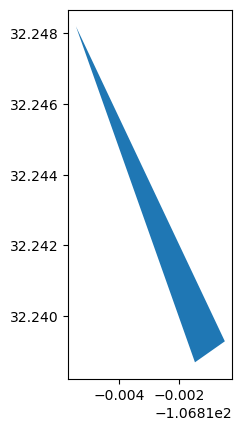

In [51]:
# Load the cropland shapefile
cropland_shapefile_path = 'data/Shapefiles/MES48R_CroplandMask.shp'
cropland_gdf = gp.read_file(cropland_shapefile_path)
cropland_gdf.plot()

In [52]:
# Check the masking coordinate system
cropland_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
# Check the raster coordinate system
src.crs

CRS.from_epsg(32613)

In [54]:
# Get everything in the same cooridnate system
# cropland_gdf = cropland_gdf.to_crs(band_red.crs)
cropland_gdf = cropland_gdf.to_crs(src.crs)
# indice.set_crs(epsg=26912)

# Convert the GeoDataFrame to a list of GeoJSON-like dicts
cropland_shapes = [cropland_gdf.geometry.iloc[i].__geo_interface__ for i in range(len(cropland_gdf))]

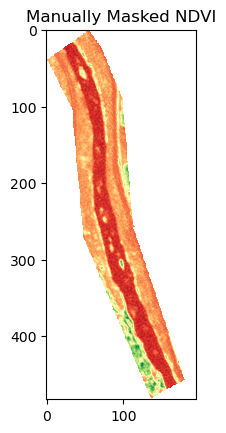

In [60]:
# Create a binary mask manually based on the cropland shapes
manual_mask = np.ones_like(indice, dtype=bool)  # Start with a mask of all True (mask everything)
original_transform = src.transform

# Apply the shapefile geometries manually to set specific areas to False (don't mask)
for shape in cropland_shapes:
    geom_mask = rasterio.features.geometry_mask([shape], transform=original_transform, invert=False, out_shape=ndvi.shape)
    manual_mask &= geom_mask  # Combine masks

nodata_value = np.nan

# Apply the manual mask
manual_masked_indice = np.where(manual_mask, indice, nodata_value)

plt.imshow(manual_masked_indice, cmap=plt.cm.RdYlGn )
plt.title('Manually Masked NDVI')
plt.show()


If it looks like it worked, set your indice to manually masked indice.

In [59]:
indice = manual_masked_indice

NameError: name 'manual_masked_indice' is not defined

### Save the image 

Next, you're going to save the calculated msavi2 values to a new image file, making sure the new image file has the same geospatial metadata as the original GeoTIFF we downloaded.

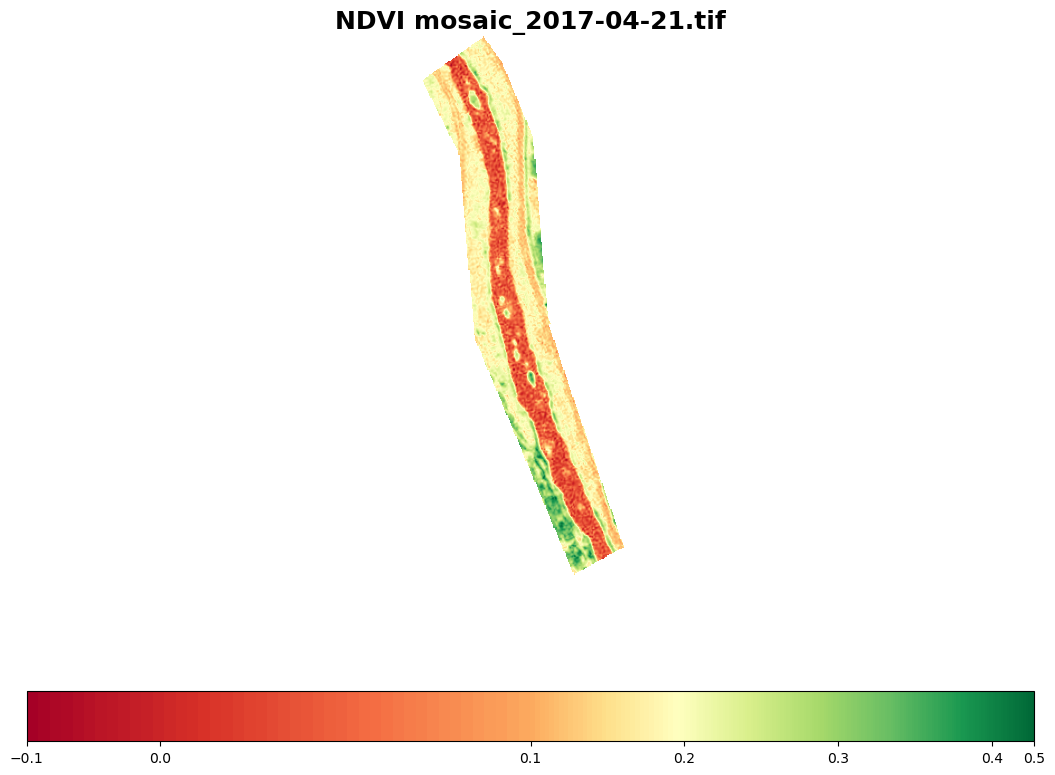

In [58]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

"""
The msavi2 values will range from -1 to 1. You want to use a diverging color scheme to visualize the data,
and you want to center the colorbar at a defined midpoint. The class below allows you to normalize the colorbar.
"""

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


# Set min/max values from msavi2 range for image (excluding NAN)
# set midpoint according to how msavi2 is interpreted: https://earthobservatory.nasa.gov/Features/MeasuringVegetation/
min=np.nanmin(indice)
max=np.nanmax(indice)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# diverging color scheme chosen from https://matplotlib.org/users/colormaps.html
cmap = plt.cm.RdYlGn 
cax = ax.imshow(indice, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title(name_of_indice+" "+str(filename), fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

# fig.savefig(outputpath+filename+"msavi2-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

### Perform the MSAVI2 calculation

Next, you're going to calculate msavi2 through subtraction and division of the values stored in the NumPy arrays. This calculation will give you values better corrected for soil brightness that range from -1 to 1. Values closer to 1 indicate a greater density of vegetation or higher level of "greenness."

In [88]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate msavi2. This is the equation at the top of this guide expressed in code
# msavi2 = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
# msavi2 = (2 * band_nir + 1 - (1*np.sqrt((2*band_nir + 1) - 8 * (band_nir - band_red)))) / 2

indice = ((2*band_nir) + 1 - np.sqrt((2*band_nir+1)**2 - 8*(band_nir-band_red))) / 2 

In [89]:
indice

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

This part of the code is if you want to set thresholds to block out certain msavi2 values.  For example, water is a negative msavi2 value and bare soil is near zero.  Some crops have really high msavi2 values.  You can adjust these numbers below and the code will replace them with nan values.

In [101]:
rivermin = 0.01
cropmax = 0.7
# msavi2_blocked = msavi2[msavi2>=rivermin]
indice_blocked = indice.astype('float')
indice_blocked[indice_blocked<=rivermin] = np.nan
# msavi2_blocked[(msavi2_blocked <=rivermin)|(msavi2_blocked >= cropmax)] = np.nan
indice_blocked

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [102]:
# check range of values, excluding NaN
np.nanmin(indice_blocked), np.nanmax(indice_blocked)

(875.894775390625, 4586.28271484375)

In [105]:
# If the above looks correctly, run this
indice = indice_blocked

### Save an msavi2 image 

Next, you're going to save the calculated msavi2 values to a new image file, making sure the new image file has the same geospatial metadata as the original GeoTIFF we downloaded.

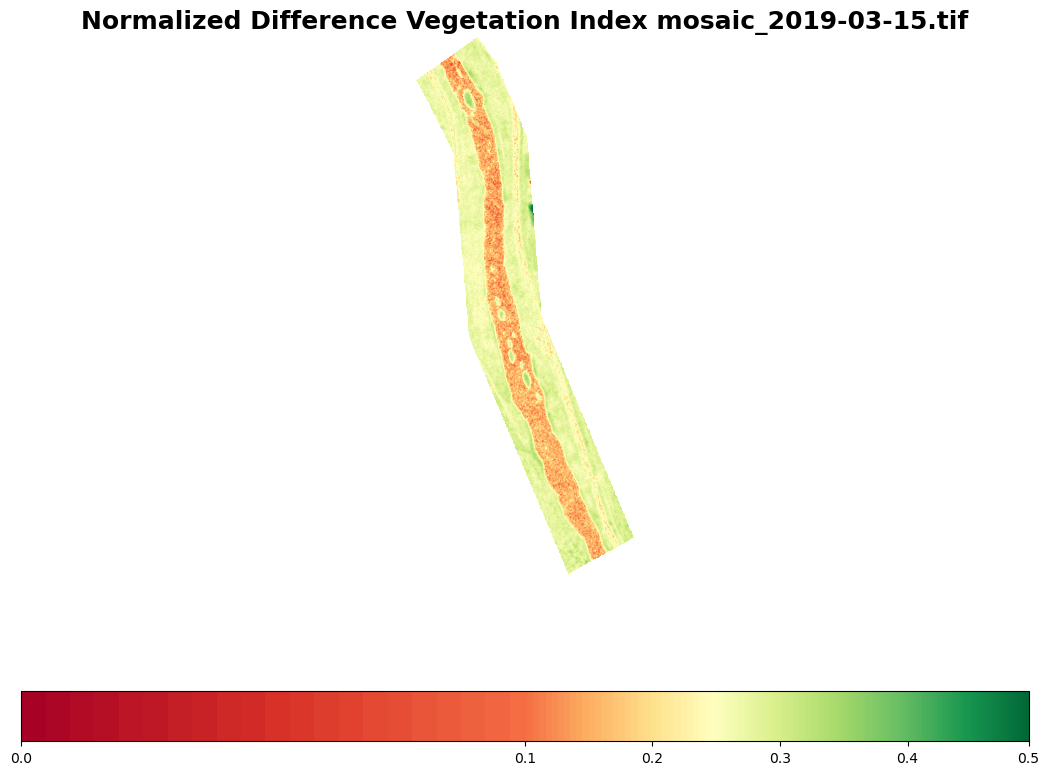

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

"""
The msavi2 values will range from -1 to 1. You want to use a diverging color scheme to visualize the data,
and you want to center the colorbar at a defined midpoint. The class below allows you to normalize the colorbar.
"""

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


# Set min/max values from msavi2 range for image (excluding NAN)
# set midpoint according to how msavi2 is interpreted: https://earthobservatory.nasa.gov/Features/MeasuringVegetation/
min=np.nanmin(indice)
max=np.nanmax(indice)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# diverging color scheme chosen from https://matplotlib.org/users/colormaps.html
cmap = plt.cm.RdYlGn 

cax = ax.imshow(indice, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title('Normalized Difference Vegetation Index '+str(filename), fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

# fig.savefig(outputpath+filename+"msavi2-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

Now to perform the calculation for multiple files at once

First create a list of all the msavi2 files

In [111]:
# filepath = 'outputfiles/'+site_name+'_fromdesktop/'+site_name+'/'
# outputpath = 'outputfiles/'+site_name+'_fromdesktop/'+site_name+'/msavi/'
outputpath = 'outputfiles/'+site_name+'/msavi2/'
items = glob.glob('outputfiles/MES_48R/*.tif')
# items = glob.glob('outputfiles/'+site_name+'_fromdesktop/'+site_name+'/*.tif')
items.sort()
items

['outputfiles/MES_48R/mosaic_2016-01-11.tif',
 'outputfiles/MES_48R/mosaic_2016-01-24.tif',
 'outputfiles/MES_48R/mosaic_2016-02-04.tif',
 'outputfiles/MES_48R/mosaic_2016-02-10.tif',
 'outputfiles/MES_48R/mosaic_2016-02-15.tif',
 'outputfiles/MES_48R/mosaic_2016-02-28.tif',
 'outputfiles/MES_48R/mosaic_2016-03-02.tif',
 'outputfiles/MES_48R/mosaic_2016-04-10.tif',
 'outputfiles/MES_48R/mosaic_2016-04-30.tif',
 'outputfiles/MES_48R/mosaic_2016-06-06.tif',
 'outputfiles/MES_48R/mosaic_2016-07-09.tif',
 'outputfiles/MES_48R/mosaic_2016-07-23.tif',
 'outputfiles/MES_48R/mosaic_2017-01-31.tif',
 'outputfiles/MES_48R/mosaic_2017-02-05.tif',
 'outputfiles/MES_48R/mosaic_2017-02-25.tif',
 'outputfiles/MES_48R/mosaic_2017-03-08.tif',
 'outputfiles/MES_48R/mosaic_2017-03-12.tif',
 'outputfiles/MES_48R/mosaic_2017-04-21.tif',
 'outputfiles/MES_48R/mosaic_2017-05-02.tif',
 'outputfiles/MES_48R/mosaic_2017-05-17.tif',
 'outputfiles/MES_48R/mosaic_2017-05-20.tif',
 'outputfiles/MES_48R/mosaic_2017-

See how many images you have per year

In [112]:
years = range(2010,2023)
for y in years:
    year = str(y)
    # yearcount = glob.glob('outputfiles/'+site_name+'_fromdesktop/'+site_name+'/*'+year+'*.tif')
    yearcount = glob.glob('outputfiles/'+site_name+'/*'+year+'*.tif')
    print(year,':',len(yearcount))

2010 : 0
2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 12
2017 : 20
2018 : 65
2019 : 106
2020 : 229
2021 : 202
2022 : 196


In [113]:
# Change this based on what minimum to set for the streambed (same as above)
rivermin = 0.2
cropmax = 0.7

In [114]:
# For loop to calculate msavi2 for all images in the list

for i in items:
    mosaic = i
    # Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
    with rasterio.open(mosaic) as src:
        band_red = src.read(3)
    with rasterio.open(mosaic) as src:
        band_nir = src.read(4)
    # Allow division by zero
    np.seterr(divide='ignore', invalid='ignore')

    # Calculate msavi2. This is the equation at the top of this guide expressed in code
    # msavi2 = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)# check range msavi2 values, excluding NaN
    # msavi2_blocked = msavi2.astype('float')
    # msavi2_blocked[msavi2_blocked <=rivermin] = 'nan'
    # msavi2_blocked[msavi2_blocked >=cropmax] = 'nan'
    # msavi2 = msavi2_blocked
    # np.nanmin(msavi2), np.nanmax(msavi2)

    # Calculate MSAVI2
    indice = (2 * band_nir + 1 - (1*np.sqrt((2*band_nir + 1) - 8 * (band_nir - band_red)))) / 2

    date = i[-14:-4]
    # Set spatial characteristics of the output object to mirror the input
    kwargs = src.meta
    kwargs.update(
        dtype=rasterio.float32,
        count = 1)

    # Write band calculations to a new raster file
    with rasterio.open(outputpath+date+'_msavi2.tif', 'w', **kwargs) as dst:
            dst.write_band(1, indice.astype(rasterio.float32))

print("Msavi2 files exported.")

Msavi2 files exported.


### Visualize the msavi2 values on the image

In the last two steps, you'll use [Matplotlib](https://matplotlib.org/) to visualize the msavi2 values you calculated for the PlanetScope scene. First you'll view a map of the msavi2 values; then you'll generate a histogram of msavi2 values. 

### Generate a histogram of values

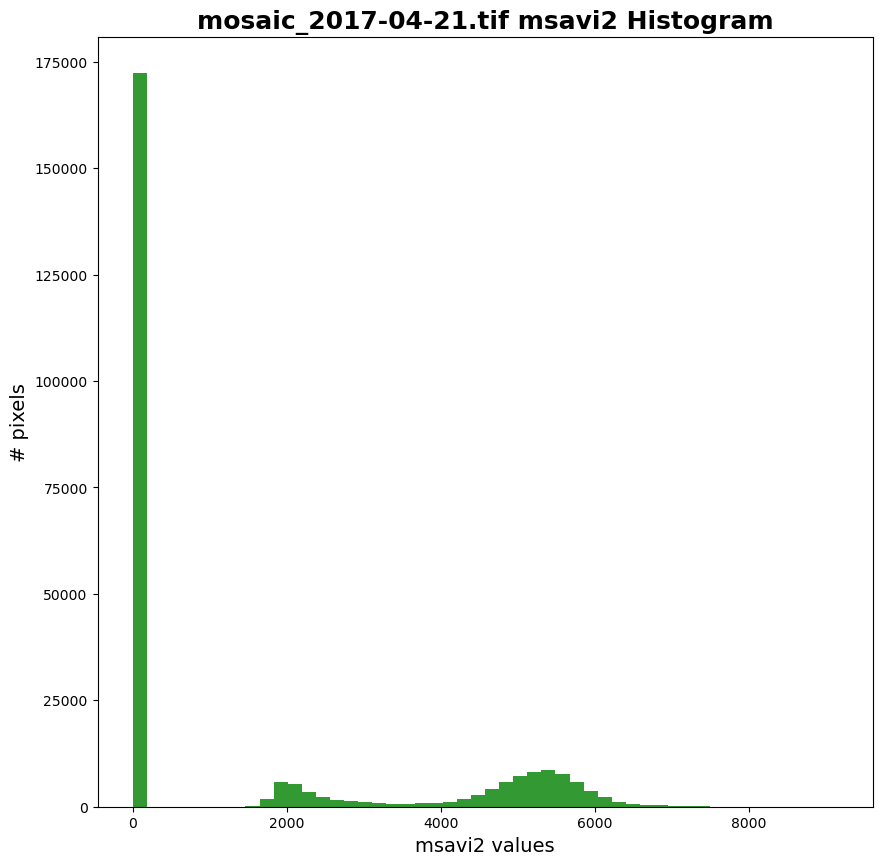

In [116]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title(str(filename)+" msavi2 Histogram", fontsize=18, fontweight='bold')
plt.xlabel("msavi2 values", fontsize=14)
plt.ylabel("# pixels", fontsize=14)


x = indice[~np.isnan(indice)]
numBins = 50
ax.hist(x,numBins,color='green',alpha=0.8)

# fig2.savefig(outputpath+filename+" msavi2-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

## Creating a time indexed dataframe

First, read in the AOI file.  It will be used later to clean up the image.

<Axes: >

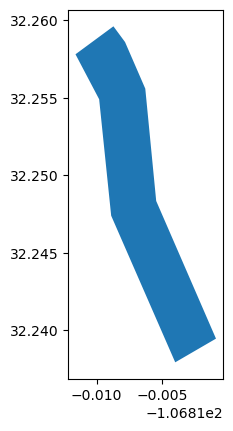

In [118]:
# Read in the Shapefile
# filename = 'AOI/'+site_name+'_simplified.shp'
filename = 'AOI/'+site_name+'_riverbuffer.geojson'
# filepath = os.path.join('Data/Shapefiles/', filename)
# filepath = os.path.join('Data/Shapefiles/', filename)
study_areas = gp.read_file(filename)
study_areas.plot()

In [120]:
# Open calculated indice in xarray
msavi2_tifs = glob.glob('outputfiles/'+site_name+'/msavi2/*msavi2.tif')
msavi2_tifs.sort()
msavi2_tifs

['outputfiles/MES_48R/msavi2/2016-01-11_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-01-24_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-02-04_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-02-10_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-02-15_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-02-28_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-03-02_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-04-10_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-04-30_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-06-06_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-07-09_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2016-07-23_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-01-31_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-02-05_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-02-25_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-03-08_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-03-12_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-04-21_msavi2.tif',
 'outputfiles/MES_48R/msavi2/2017-05-02_msavi2

This code pulls the dates from the filenames and puts them into an array

In [123]:
date_list = []
for i in msavi2_tifs:
    print(i)
    # date = i[-14:-4]
    date = i[-21:-11]
    parsed_date = datetime.datetime.strptime(date, "%Y-%m-%d")
    date_list.append(parsed_date)
dt_array = np.array(date_list, dtype='datetime64')
dt_array.sort()

outputfiles/MES_48R/msavi2/2016-01-11_msavi2.tif
outputfiles/MES_48R/msavi2/2016-01-24_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-04_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-10_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-15_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-28_msavi2.tif
outputfiles/MES_48R/msavi2/2016-03-02_msavi2.tif
outputfiles/MES_48R/msavi2/2016-04-10_msavi2.tif
outputfiles/MES_48R/msavi2/2016-04-30_msavi2.tif
outputfiles/MES_48R/msavi2/2016-06-06_msavi2.tif
outputfiles/MES_48R/msavi2/2016-07-09_msavi2.tif
outputfiles/MES_48R/msavi2/2016-07-23_msavi2.tif
outputfiles/MES_48R/msavi2/2017-01-31_msavi2.tif
outputfiles/MES_48R/msavi2/2017-02-05_msavi2.tif
outputfiles/MES_48R/msavi2/2017-02-25_msavi2.tif
outputfiles/MES_48R/msavi2/2017-03-08_msavi2.tif
outputfiles/MES_48R/msavi2/2017-03-12_msavi2.tif
outputfiles/MES_48R/msavi2/2017-04-21_msavi2.tif
outputfiles/MES_48R/msavi2/2017-05-02_msavi2.tif
outputfiles/MES_48R/msavi2/2017-05-17_msavi2.tif
outputfiles/MES_48R/

In [124]:
dt_array

array(['2016-01-11T00:00:00.000000', '2016-01-24T00:00:00.000000',
       '2016-02-04T00:00:00.000000', '2016-02-10T00:00:00.000000',
       '2016-02-15T00:00:00.000000', '2016-02-28T00:00:00.000000',
       '2016-03-02T00:00:00.000000', '2016-04-10T00:00:00.000000',
       '2016-04-30T00:00:00.000000', '2016-06-06T00:00:00.000000',
       '2016-07-09T00:00:00.000000', '2016-07-23T00:00:00.000000',
       '2017-01-31T00:00:00.000000', '2017-02-05T00:00:00.000000',
       '2017-02-25T00:00:00.000000', '2017-03-08T00:00:00.000000',
       '2017-03-12T00:00:00.000000', '2017-04-21T00:00:00.000000',
       '2017-05-02T00:00:00.000000', '2017-05-17T00:00:00.000000',
       '2017-05-20T00:00:00.000000', '2017-05-26T00:00:00.000000',
       '2017-06-25T00:00:00.000000', '2017-06-30T00:00:00.000000',
       '2017-09-17T00:00:00.000000', '2017-09-22T00:00:00.000000',
       '2017-10-17T00:00:00.000000', '2017-10-28T00:00:00.000000',
       '2017-11-05T00:00:00.000000', '2017-11-26T00:00:00.0000

Print the Number of maps or days we have

In [125]:
len(msavi2_tifs)

993

In [128]:
msavi2_tifs[974]

'outputfiles/MES_48R/msavi2/2023-09-04_msavi2.tif'

In [129]:
# Testing to see if coordinate systems match
test_case = msavi2_tifs[751]
print(test_case)
msavi2_file_toclip = xr.open_dataset(test_case)
mask = study_areas
print("mask crs:", mask.crs)
print("data crs:", msavi2_file_toclip.rio.crs)
msavi2_file_toclip_array = msavi2_file_toclip['band_data'].to_numpy()
msavi2_file_toclip_array.shape

outputfiles/MES_48R/msavi2/2022-07-10_msavi2.tif
mask crs: EPSG:4326
data crs: EPSG:32613


(1, 804, 326)

Note 9/22 - the issue is each image changes resolutions.  Try interpolating each before converting to numpy following this tutorial:
https://stackoverflow.com/questions/63189798/change-resolution-of-one-dataarray-to-match-another

In [130]:
test_msavi2file_highres = xr.open_dataset(msavi2_tifs[0])
test_msavi2file_lowres = xr.open_dataset(msavi2_tifs[751])

In [131]:
test_msavi2file_lowres

<xarray.Dataset>
Dimensions:      (band: 1, x: 326, y: 804)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.284e+05 3.284e+05 ... 3.294e+05 3.294e+05
  * y            (y) float64 3.571e+06 3.571e+06 ... 3.568e+06 3.568e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [132]:
test_msavi2file_highres

<xarray.Dataset>
Dimensions:      (band: 1, x: 196, y: 483)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.284e+05 3.284e+05 ... 3.294e+05 3.294e+05
  * y            (y) float64 3.571e+06 3.571e+06 ... 3.568e+06 3.568e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

These images don't necessarily have to be high or low resolution, the code should interpolate them all to whatever resolution the high-res file is

In [133]:
da1 = test_msavi2file_lowres
da2 = test_msavi2file_highres
new_x = np.linspace(da1.x[0], da1.x[-1], da2.sizes['x'])
new_y = np.linspace(da1.y[0], da1.y[-1], da2.sizes['y'])
da1_interpolated = da1.interp(y = new_y, x = new_x)
da1_interpolated



<xarray.Dataset>
Dimensions:      (band: 1, y: 483, x: 196)
Coordinates:
  * band         (band) int64 1
    spatial_ref  int64 0
  * y            (y) float64 3.571e+06 3.571e+06 ... 3.568e+06 3.568e+06
  * x            (x) float64 3.284e+05 3.284e+05 ... 3.294e+05 3.294e+05
Data variables:
    band_data    (band, y, x) float64 nan nan nan nan nan ... nan nan nan nan

See what it looks like

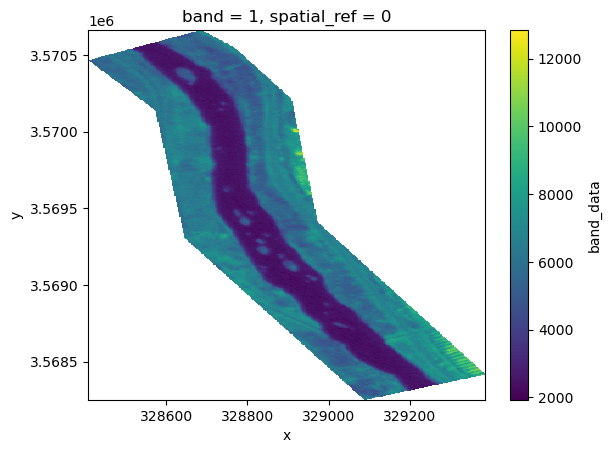

In [134]:
msavi2_file_toclip['band_data'].plot()

In [135]:
# Skip this if they are both in the same coordinate system and change info in next cell
mask_reproject = mask.to_crs(epsg=32613)
print("mask crs:", mask_reproject.crs)

mask crs: EPSG:32613


<Axes: >

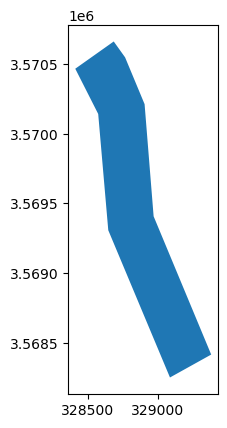

In [136]:
mask_reproject.plot()

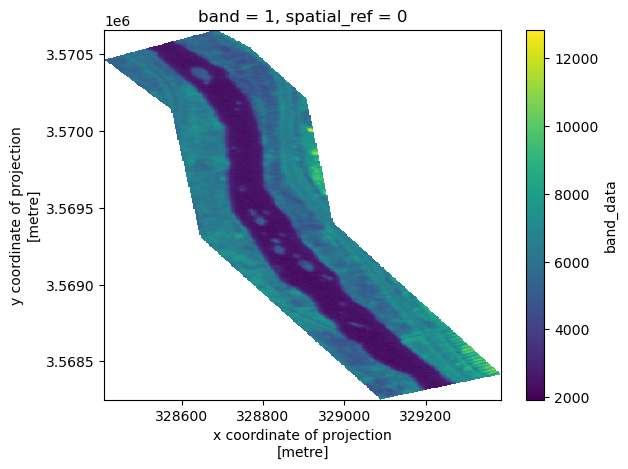

In [138]:
# Clipping
clipped = msavi2_file_toclip.rio.clip(mask_reproject.geometry, mask_reproject.crs)
clipped['band_data'].plot()

In [139]:
clipped_np = clipped['band_data'].to_numpy()
clipped_np.shape

(1, 803, 325)

This interpolates all the tifs and makes sure to only clip the areas we want

In [140]:
test_msavi2file_highres = xr.open_dataset(msavi2_tifs[-1])
all_data = []
for i in range(0,len(msavi2_tifs),1):
    print(msavi2_tifs[i])
    msavi2_file = xr.open_dataset(msavi2_tifs[i])
   
    clipped = msavi2_file.rio.clip(mask_reproject.geometry, mask_reproject.crs)

    da1 = clipped
    da2 = test_msavi2file_highres
    new_x = np.linspace(da1.x[0], da1.x[-1], da2.sizes['x'])
    new_y = np.linspace(da1.y[0], da1.y[-1], da2.sizes['y'])
    da1_interpolated = da1.interp(y = new_y, x = new_x)

    msavi2_data = da1_interpolated['band_data']
    
    # msavi2_data = msavi2_file['band_data']
    
    msavi2_array = msavi2_data.to_numpy()
    
    # also_array = np.pad(msavi2_array.astype(float),(0,483*196- msavi2_array.size), mode='constant',constant_values=np.nan).reshape(1,483,196)

    # also_array.shape
    # msavi2_array = msavi2_file['band_data'].to_numpy()
    # print(type(msavi2_array))

    # # dummy_array = np.ndarray(shape=msavi2_array_1,dtype=float)
    # # msavi2_array.read.direct(dummy_array)
    # # np.place(dummy_array, dummy_array==msavi2_array.attrs.get('_FillValue'),np.nan)
    # msavi2_array=np.ndarray(shape=msavi2_data.shape,dtype=float)
    # msavi2_data.read_direct(msavi2_array)
    # np.place(msavi2_array,msavi2_array==msavi2_data.attrs.get('_FillValue'), np.nan)
    all_data.append(msavi2_array)
    
    # print(msavi2_array.shape)
    
    # all_data.append(msavi2_file)
all_data

outputfiles/MES_48R/msavi2/2016-01-11_msavi2.tif
outputfiles/MES_48R/msavi2/2016-01-24_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-04_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-10_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-15_msavi2.tif
outputfiles/MES_48R/msavi2/2016-02-28_msavi2.tif
outputfiles/MES_48R/msavi2/2016-03-02_msavi2.tif
outputfiles/MES_48R/msavi2/2016-04-10_msavi2.tif
outputfiles/MES_48R/msavi2/2016-04-30_msavi2.tif
outputfiles/MES_48R/msavi2/2016-06-06_msavi2.tif
outputfiles/MES_48R/msavi2/2016-07-09_msavi2.tif
outputfiles/MES_48R/msavi2/2016-07-23_msavi2.tif
outputfiles/MES_48R/msavi2/2017-01-31_msavi2.tif
outputfiles/MES_48R/msavi2/2017-02-05_msavi2.tif
outputfiles/MES_48R/msavi2/2017-02-25_msavi2.tif
outputfiles/MES_48R/msavi2/2017-03-08_msavi2.tif
outputfiles/MES_48R/msavi2/2017-03-12_msavi2.tif
outputfiles/MES_48R/msavi2/2017-04-21_msavi2.tif
outputfiles/MES_48R/msavi2/2017-05-02_msavi2.tif
outputfiles/MES_48R/msavi2/2017-05-17_msavi2.tif
outputfiles/MES_48R/

[array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]),
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]),
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]),
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ...,

In [141]:
combo = np.vstack(all_data)
combo.shape

(993, 804, 326)

In [142]:
lat_main = test_msavi2file_highres['x']
lon_main = test_msavi2file_highres['y']

lon_main = lon_main.to_numpy()
lat_main = lat_main.to_numpy()
# lat_main

In [143]:
print("Main data shape: ", combo.shape)
print('Longitude shape: ', lon_main.shape)
print("Latitude shape: ", lat_main.shape)
print('Data Shape: ', dt_array.shape)

Main data shape:  (993, 804, 326)
Longitude shape:  (804,)
Latitude shape:  (326,)
Data Shape:  (993,)


Creating the x-array

In [144]:
data_xr = xr.DataArray(
    combo,
    coords={'time':dt_array,'lon': lon_main,'lat': lat_main}, 
    dims=["time","lon", "lat"],
    attrs=dict(
        description="Calculated msavi2")
)
data_xr

<xarray.DataArray (time: 993, lon: 804, lat: 326)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2016-01-11 2016-01-24 ... 2023-10-08
  * lon      (lon) float64 3.571e+06 3.571e+06 3.571e+06 ... 3.568e+06 3.568e+06
  * lat      (lat) float64 3.284e+05 3.284e+05 3.284e+05 ... 3.294e+05 3.294e+05
Attributes:
    description:  Calculated NDVI

In [145]:
data_xr2 = data_xr.rio.set_spatial_dims('lat','lon')


This writes an .nc file but it exports the time dimension as bands.  Haven't figured out how to fix that quite yet

In [146]:
# data_xr2.rio.to_raster(r"MES15R_msavi2_time.nc")

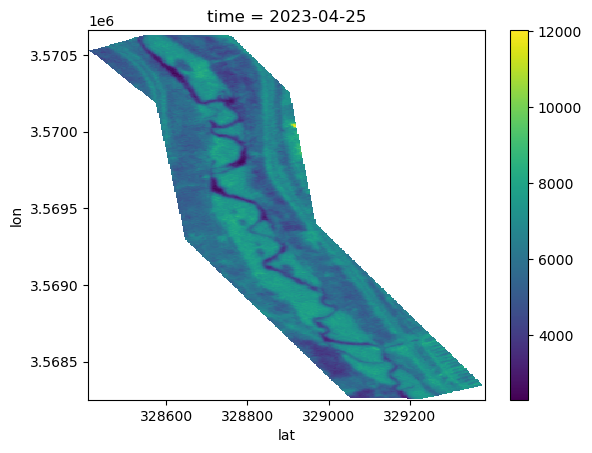

In [147]:
# Visualize the first timestep
data_xr2[900,:,:].plot()

This whole area is workshopping how to plot r2 in space

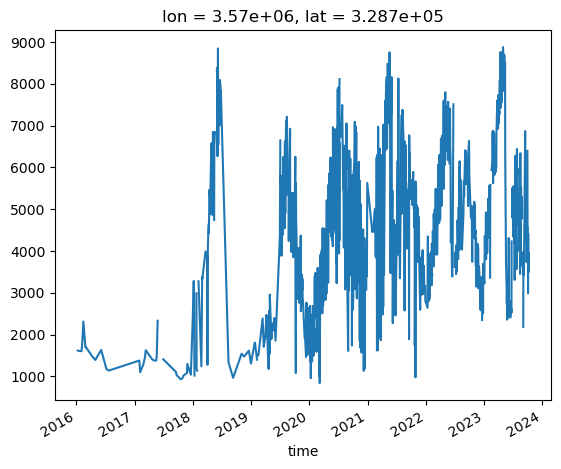

In [148]:
# Plotting the TS of a pixel
data_xr2[:,100,100].plot()

In [149]:
pixel = data_xr2[:,100,100].values
pixel.shape

(993,)

In [150]:
time = data_xr2['time'].values

In [151]:
time.shape

(993,)

In [165]:
data_test = data_xr2
data_test = data_test.rename('msavi2')
data_test

<xarray.DataArray 'msavi2' (time: 993, lon: 804, lat: 326)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2016-01-11 2016-01-24 ... 2023-10-08
  * lon      (lon) float64 3.571e+06 3.571e+06 3.571e+06 ... 3.568e+06 3.568e+06
  * lat      (lat) float64 3.284e+05 3.284e+05 3.284e+05 ... 3.294e+05 3.294e+05
Attributes:
    description:  Calculated NDVI

In [166]:
pixel = data_xr2[:,400,100].values
pixel.shape

(993,)

In [167]:
time = data_xr2['time'].values

In [168]:
# import scipy.stats as sp
df1 = time
df2 = pixel
y=np.array(df2, dtype=float)
x=np.array(pd.to_datetime(df1), dtype=float)
corr_coef = np.corrcoef(y, x)
corr_coef[0,1]
# pearsonr(x,y)

nan

This bit of code attempts to create a correlation plot of msavi2 values and time per pixel.  It worked a year ago but randomly broke

In [156]:
import xarray as xr
import numpy as np

# Assuming you have a 3D xarray DataArray named 'data' with dimensions ('time', 'latitude', 'longitude')

# Generate some example data
# data = xr.DataArray(np.random.rand(10, 3, 4), dims=('time', 'latitude', 'longitude'))
data = data_xr2

# Function to calculate correlation while ignoring NaN values
def corr_ignore_nan(x, y):
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(valid_mask) < 2:  # Not enough valid data points for correlation
        return np.nan
    else:
        return np.corrcoef(x[valid_mask], y[valid_mask])[0, 1]

# Use apply_ufunc to apply the correlation function along the 'time' dimension
correlation_result = xr.apply_ufunc(
    corr_ignore_nan,
    data,  # your 3D data
    data.time,  # you can choose another variable for correlation if needed
    input_core_dims=[['time'], ['time']],  # specify the core dimensions for each input
    vectorize=True,  # vectorize the function for better performance
    dask='parallelized',  # use parallelized computation if using dask arrays
    output_dtypes=[float]  # specify the output data type
)

# Print or use the result as needed
# print(correlation_result)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>)

In [157]:
correlation_result.plot()

NameError: name 'correlation_result' is not defined

Comparing with the first timestep to see if it makes sense

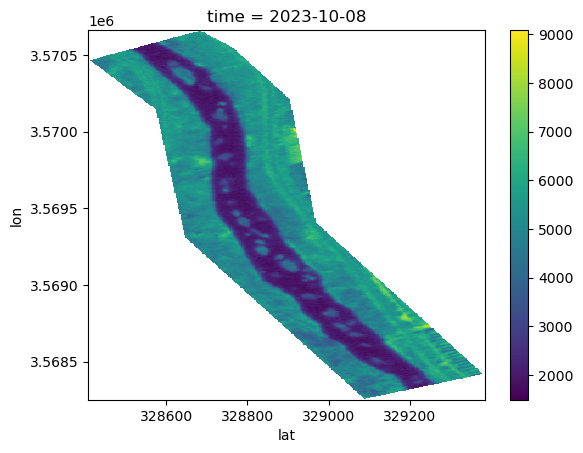

In [158]:
data_xr2[992,:,:].plot()

Clipping the weird bits

In [159]:
correlation_result = correlation_result.rio.set_spatial_dims('lat','lon')
correlation_result = correlation_result.rio.write_crs(32613)
correlation_result_clipped = correlation_result.rio.clip(mask_reproject.geometry, mask_reproject.crs)
correlation_result_clipped.plot()

NameError: name 'correlation_result' is not defined

Calculate p-value based on correlation coefficient and create a p-value plot

In [160]:
p_value = 2 * (1 - np.abs(correlation_result_clipped))

p_value = p_value.rio.set_spatial_dims('lat','lon')
p_value = p_value.rio.write_crs(32613)
p_value_clipped = p_value.rio.clip(mask_reproject.geometry, mask_reproject.crs)
p_value_clipped.plot()

NameError: name 'correlation_result_clipped' is not defined

Map of average msavi2 in the whole time period

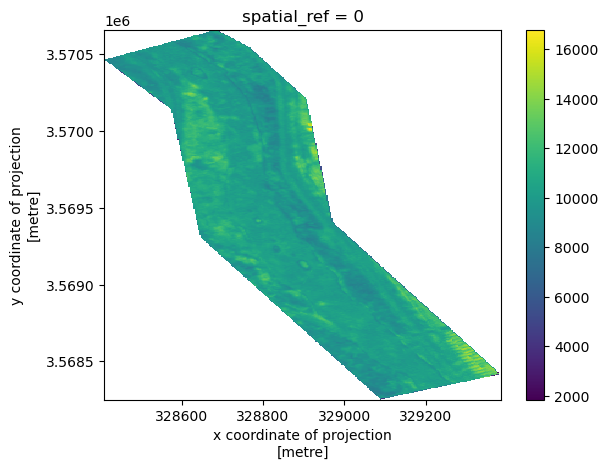

In [169]:
mean_msavi2_space = data_xr2.max(('time'))
mean_msavi2_space = mean_msavi2_space.rio.set_spatial_dims('lat','lon')
mean_msavi2_space = mean_msavi2_space.rio.write_crs(32613)
mean_msavi2_space_clipped = mean_msavi2_space.rio.clip(mask_reproject.geometry, mask_reproject.crs)
mean_msavi2_space_clipped.plot()

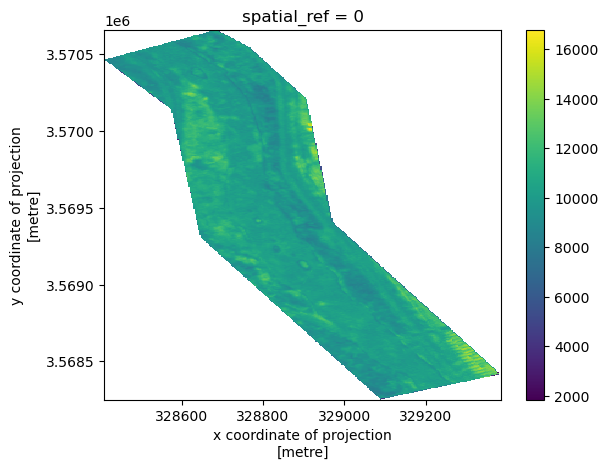

In [170]:
# Max msavi2 per pixel Map

max_msavi2_space = data_xr2.max(('time'))
max_msavi2_space = max_msavi2_space.rio.set_spatial_dims('lat','lon')
max_msavi2_space = max_msavi2_space.rio.write_crs(32613)
max_msavi2_space_clipped = max_msavi2_space.rio.clip(mask_reproject.geometry, mask_reproject.crs)
max_msavi2_space_clipped.plot()

## Timeseries Plots

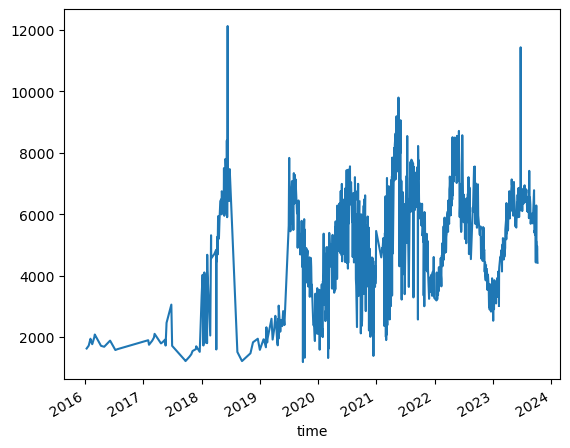

In [174]:
# Study area mean
msavi2_ts = data_xr2.mean(('lon','lat'))
msavi2_ts.plot()

Average by year

In [175]:
msavi2_ts_df = msavi2_ts.to_dataframe(name='msavi2')
msavi2_ts_df['Year'] = pd.DatetimeIndex(msavi2_ts_df.index).year
msavi2_ts_df

,msavi2,Year
time,,
2016-01-11,1630.338828,2016
2016-01-24,1724.738004,2016
2016-02-04,1948.351327,2016
2016-02-10,1834.825104,2016
2016-02-15,1771.239902,2016
...,...,...
2023-10-04,4710.785496,2023
2023-10-05,4969.030555,2023
2023-10-06,4855.388514,2023


Text(0, 0.5, 'msavi2 (-1 to 1)')

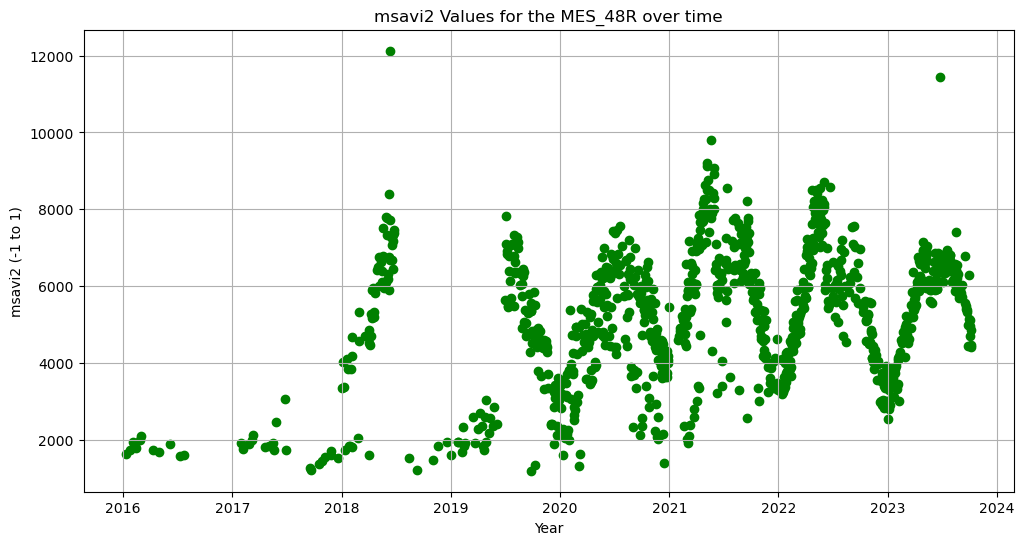

In [176]:
f, ax = plt.subplots(figsize=(12,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(msavi2_ts_df.index, msavi2_ts_df['msavi2'], c='green')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 Values for the "+site_name+" over time")
# ax.legend(loc = 'upper right')
ax.grid(zorder = 0)
plt.xlabel('Year')
plt.ylabel('msavi2 (-1 to 1)')

From here down is code specific for trying to make plots for sites along the Rio Grande.

I've left them in just in case there is something useful in here, but otherwise the above code should get you started!

-------------------------------------------------------------------------

In [177]:
# Read in Erik's DTW Data (had to change from excel to csv)
head_rawdata = pd.read_csv('Data/EBID/'+site_name+'_DTW.csv')
head_rawdata

,DateTime,TOIC_Elevation,Benchmark_Elevation,Groundwater_Elevation,DTW_TOIC,DTW_Surface
0,8/19/09,3882.31,3881.2,3872.82,9.49,8.37
1,8/20/09,3882.31,3881.2,3872.91,9.40,8.28
2,8/21/09,3882.31,3881.2,3872.92,9.39,8.27
3,8/22/09,3882.31,3881.2,3873.07,9.24,8.13
4,8/23/09,3882.31,3881.2,3873.16,9.15,8.04
...,...,...,...,...,...,...
5043,7/24/23,3882.31,3881.2,"3,872.44",9.87,8.76
5044,7/25/23,3882.31,3881.2,"3,872.45",9.86,8.75
5045,7/26/23,3882.31,3881.2,"3,872.48",9.83,8.72
5046,7/27/23,3882.31,3881.2,"3,872.49",9.82,8.71


In [178]:
head_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               5048 non-null   object 
 1   TOIC_Elevation         5046 non-null   float64
 2   Benchmark_Elevation    5046 non-null   float64
 3   Groundwater_Elevation  5042 non-null   object 
 4   DTW_TOIC               5042 non-null   float64
 5   DTW_Surface            5042 non-null   float64
dtypes: float64(4), object(2)
memory usage: 236.8+ KB


In [179]:
# head_rawdata['Groundwater_Elevation'] = pd.to_numeric(head_rawdata['Groundwater_Elevation'], errors='coerce')

head_rawdata['Groundwater_Elevation'] = pd.to_numeric(head_rawdata['Groundwater_Elevation'].str.replace(',', ''), errors='coerce')
head_rawdata

,DateTime,TOIC_Elevation,Benchmark_Elevation,Groundwater_Elevation,DTW_TOIC,DTW_Surface
0,8/19/09,3882.31,3881.2,3872.82,9.49,8.37
1,8/20/09,3882.31,3881.2,3872.91,9.40,8.28
2,8/21/09,3882.31,3881.2,3872.92,9.39,8.27
3,8/22/09,3882.31,3881.2,3873.07,9.24,8.13
4,8/23/09,3882.31,3881.2,3873.16,9.15,8.04
...,...,...,...,...,...,...
5043,7/24/23,3882.31,3881.2,3872.44,9.87,8.76
5044,7/25/23,3882.31,3881.2,3872.45,9.86,8.75
5045,7/26/23,3882.31,3881.2,3872.48,9.83,8.72
5046,7/27/23,3882.31,3881.2,3872.49,9.82,8.71


In [180]:
head_rawdata['Streambed_Elevation'] = 3874
head_rawdata

,DateTime,TOIC_Elevation,Benchmark_Elevation,Groundwater_Elevation,DTW_TOIC,DTW_Surface,Streambed_Elevation
0,8/19/09,3882.31,3881.2,3872.82,9.49,8.37,3874
1,8/20/09,3882.31,3881.2,3872.91,9.40,8.28,3874
2,8/21/09,3882.31,3881.2,3872.92,9.39,8.27,3874
3,8/22/09,3882.31,3881.2,3873.07,9.24,8.13,3874
4,8/23/09,3882.31,3881.2,3873.16,9.15,8.04,3874
...,...,...,...,...,...,...,...
5043,7/24/23,3882.31,3881.2,3872.44,9.87,8.76,3874
5044,7/25/23,3882.31,3881.2,3872.45,9.86,8.75,3874
5045,7/26/23,3882.31,3881.2,3872.48,9.83,8.72,3874
5046,7/27/23,3882.31,3881.2,3872.49,9.82,8.71,3874


In [181]:
head_rawdata['DTW_Streambed'] = head_rawdata['Streambed_Elevation'] - head_rawdata['Groundwater_Elevation']
head_rawdata

,DateTime,TOIC_Elevation,Benchmark_Elevation,Groundwater_Elevation,DTW_TOIC,DTW_Surface,Streambed_Elevation,DTW_Streambed
0,8/19/09,3882.31,3881.2,3872.82,9.49,8.37,3874,1.18
1,8/20/09,3882.31,3881.2,3872.91,9.40,8.28,3874,1.09
2,8/21/09,3882.31,3881.2,3872.92,9.39,8.27,3874,1.08
3,8/22/09,3882.31,3881.2,3873.07,9.24,8.13,3874,0.93
4,8/23/09,3882.31,3881.2,3873.16,9.15,8.04,3874,0.84
...,...,...,...,...,...,...,...,...
5043,7/24/23,3882.31,3881.2,3872.44,9.87,8.76,3874,1.56
5044,7/25/23,3882.31,3881.2,3872.45,9.86,8.75,3874,1.55
5045,7/26/23,3882.31,3881.2,3872.48,9.83,8.72,3874,1.52
5046,7/27/23,3882.31,3881.2,3872.49,9.82,8.71,3874,1.51


In [182]:
head = head_rawdata[['DateTime','DTW_TOIC','DTW_Surface','DTW_Streambed']]
head.set_index("DateTime", inplace=True)
head.index = pd.to_datetime(head.index)
head = head.reset_index()
head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       5048 non-null   datetime64[ns]
 1   DTW_TOIC       5042 non-null   float64       
 2   DTW_Surface    5042 non-null   float64       
 3   DTW_Streambed  5042 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 157.9 KB


In [183]:
msavi2_ts_df_formerge = msavi2_ts_df.copy()
del msavi2_ts_df_formerge['Year']
msavi2_ts_df_formerge = msavi2_ts_df_formerge.reset_index()
msavi2_ts_df_formerge

,time,msavi2
0,2016-01-11,1630.338828
1,2016-01-24,1724.738004
2,2016-02-04,1948.351327
3,2016-02-10,1834.825104
4,2016-02-15,1771.239902
...,...,...
988,2023-10-04,4710.785496
989,2023-10-05,4969.030555
990,2023-10-06,4855.388514
991,2023-10-07,4467.923831


In [184]:
msavi2_ts_df_formerge.rename(columns = {'time':'date'}, inplace=True)
head.rename(columns = {'DateTime':'date'}, inplace=True)

In [185]:
head_msavi2 = msavi2_ts_df_formerge.merge(head, on=['date'],how='inner')

In [186]:
head_msavi2

,date,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed
0,2016-01-11,1630.338828,15.50,14.39,7.19
1,2016-01-24,1724.738004,15.78,14.67,7.47
2,2016-02-04,1948.351327,16.05,14.94,7.74
3,2016-02-10,1834.825104,16.17,15.05,7.86
4,2016-02-15,1771.239902,16.26,15.15,7.95
...,...,...,...,...,...
950,2023-07-24,6403.486749,9.87,8.76,1.56
951,2023-07-25,6517.019626,9.86,8.75,1.55
952,2023-07-26,6625.553805,9.83,8.72,1.52
953,2023-07-27,6810.744693,9.82,8.71,1.51


Text(0.5, 0, 'msavi2 (full range -1 to 1)')

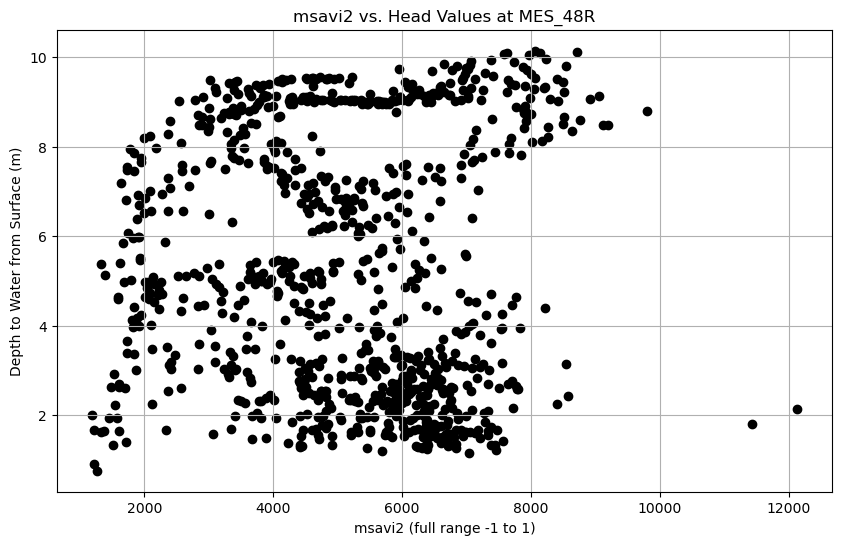

In [187]:
df = head_msavi2
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['msavi2'].values, df['DTW_Streambed'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Head Values at "+site_name)
# ax.set_xlim(0,0.5)
# ax.set_ylim(6,16)
# ax.legend(loc = 'lower left')
ax.grid(zorder = 0)
ax.set_ylabel('Depth to Water from Surface (m)')
ax.set_xlabel('msavi2 (full range -1 to 1)')


Text(0.5, 0, 'Time')

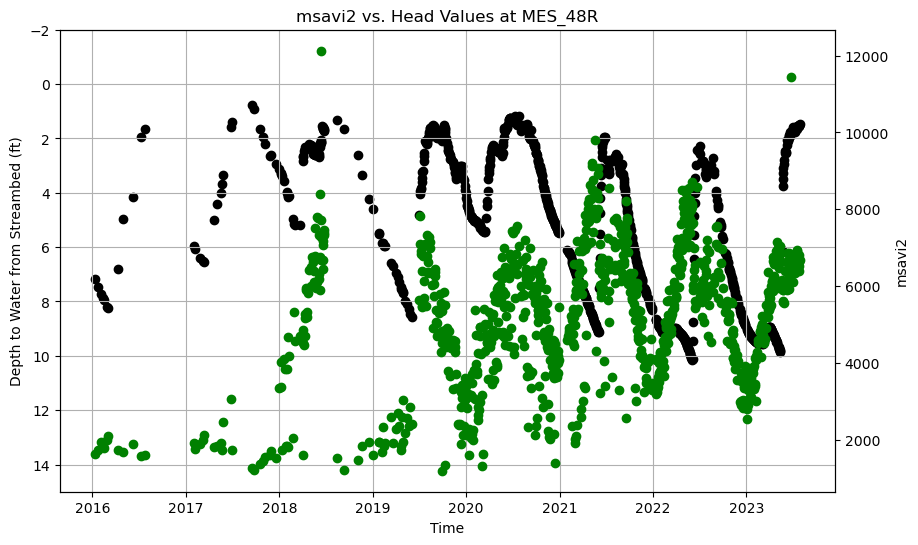

In [188]:
df = head_msavi2
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['date'].values, df['DTW_Streambed'].values, c='black',label = 'DTW_Surface')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Head Values at "+site_name)
ax2 = ax.twinx()
ax2.scatter(df['date'].values,df['msavi2'].values, c='green',label='msavi2')
# ax.set_xlim(0,0.5)
ax.set_ylim(15,-2)
# ax.legend(loc = 'upper left')
# ax2.legend(loc='lower right')
ax.grid(zorder = 0)
# ax.set_ylabel('Depth to Water from Surface (m)')
ax.set_ylabel('Depth to Water from Streambed (ft)')
ax2.set_ylabel('msavi2')
ax.set_xlabel('Time')


In [189]:
head_msavi2['Stream_Connection'] = np.where(head_msavi2['DTW_Streambed'] > 8, 'Disconnected', 'Connected')
head_msavi2

,date,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection
0,2016-01-11,1630.338828,15.50,14.39,7.19,Connected
1,2016-01-24,1724.738004,15.78,14.67,7.47,Connected
2,2016-02-04,1948.351327,16.05,14.94,7.74,Connected
3,2016-02-10,1834.825104,16.17,15.05,7.86,Connected
4,2016-02-15,1771.239902,16.26,15.15,7.95,Connected
...,...,...,...,...,...,...
950,2023-07-24,6403.486749,9.87,8.76,1.56,Connected
951,2023-07-25,6517.019626,9.86,8.75,1.55,Connected
952,2023-07-26,6625.553805,9.83,8.72,1.52,Connected
953,2023-07-27,6810.744693,9.82,8.71,1.51,Connected


<Figure size 1000x500 with 0 Axes>

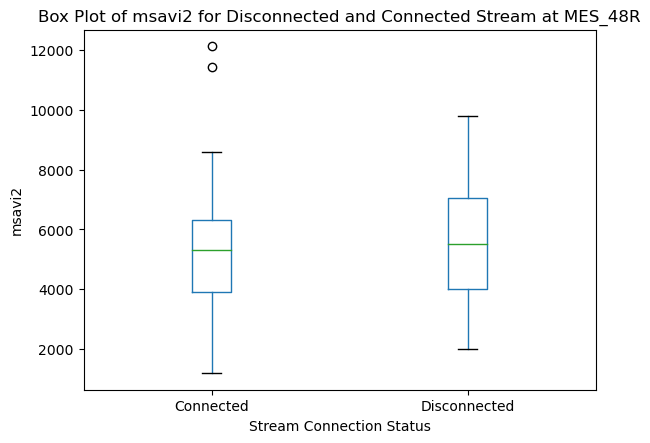

In [190]:
# Create a box plot
plt.figure(figsize=(10, 5))
head_msavi2.boxplot(column='msavi2', by='Stream_Connection', grid=False)

# Adding labels and title
plt.xlabel('Stream Connection Status')
plt.ylabel('msavi2')
plt.title('Box Plot of msavi2 for Disconnected and Connected Stream at '+site_name)
plt.suptitle('')  # Suppress the default title to avoid redundancy

# Display the plot
plt.show()

In [629]:
head_msavi2.to_csv("outputfiles/"+site_name+"/"+site_name+"_DailyTimeseriesProcessedData.csv")

In [191]:
head_msavi2_filtered = head_msavi2[head_msavi2['msavi2']>=0.2]
head_msavi2_filtered

,date,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection
0,2016-01-11,1630.338828,15.50,14.39,7.19,Connected
1,2016-01-24,1724.738004,15.78,14.67,7.47,Connected
2,2016-02-04,1948.351327,16.05,14.94,7.74,Connected
3,2016-02-10,1834.825104,16.17,15.05,7.86,Connected
4,2016-02-15,1771.239902,16.26,15.15,7.95,Connected
...,...,...,...,...,...,...
950,2023-07-24,6403.486749,9.87,8.76,1.56,Connected
951,2023-07-25,6517.019626,9.86,8.75,1.55,Connected
952,2023-07-26,6625.553805,9.83,8.72,1.52,Connected
953,2023-07-27,6810.744693,9.82,8.71,1.51,Connected


Text(0.5, 0, 'msavi2 (full range -1 to 1)')

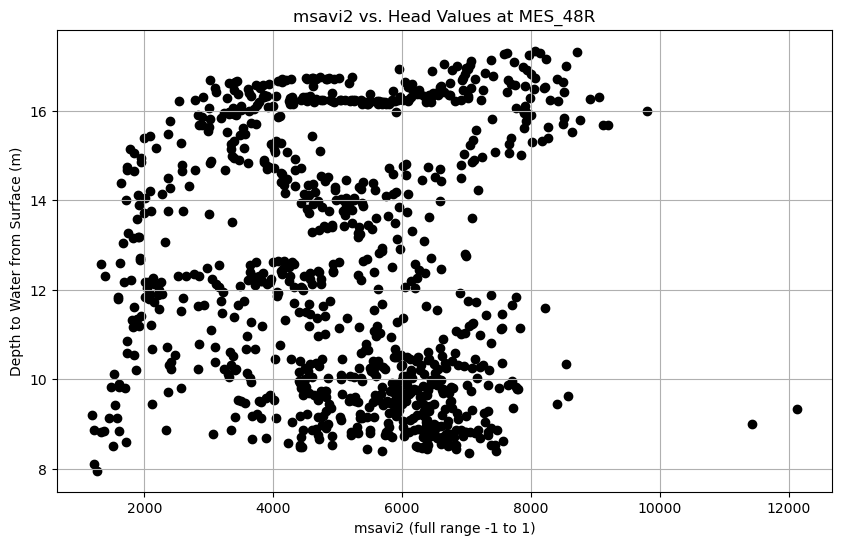

In [192]:
df = head_msavi2_filtered
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['msavi2'].values, df['DTW_Surface'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Head Values at "+site_name)
# ax.set_xlim(0,0.5)
# ax.set_ylim(6,16)
# ax.legend(loc = 'lower left')
ax.grid(zorder = 0)
ax.set_ylabel('Depth to Water from Surface (m)')
ax.set_xlabel('msavi2 (full range -1 to 1)')


In [193]:
# Define the path to the directory containing the .csv files
folder_path = 'Data/From_KC/RawGaugeData'

# List all .csv files in the directory
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty list to store individual DataFrames
dataframes = []

# Read each .csv file and append the DataFrame to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    # Convert the 'date' column to datetime format
    if 'Reading' in df.columns:
        df['Reading'] = pd.to_datetime(df['Reading'])
    
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
combined_df

,Reading,Receive,Value,Unit,Data Quality
0,2022-12-31 23:33:39,2023-02-15 08:19:06,0.0,ft,A
1,2022-12-31 23:03:47,2023-02-15 08:19:06,0.0,ft,A
2,2022-12-31 22:33:47,2023-02-15 08:19:06,0.0,ft,A
3,2022-12-31 22:03:33,2023-02-15 08:19:06,0.0,ft,A
4,2022-12-31 21:33:09,2023-02-15 08:19:06,0.0,ft,A
...,...,...,...,...,...
131764,2016-01-01 02:07:03,2024-01-29 07:13:58,0.0,ft,A
131765,2016-01-01 01:36:47,2024-01-29 07:13:58,0.0,ft,A
131766,2016-01-01 01:06:44,2024-01-29 07:13:58,0.0,ft,A
131767,2016-01-01 00:36:49,2024-01-29 07:13:58,0.0,ft,A


In [194]:
combined_df['date'] = combined_df['Reading']
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131769 entries, 0 to 131768
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Reading       131769 non-null  datetime64[ns]
 1   Receive       131769 non-null  object        
 2   Value         131769 non-null  float64       
 3   Unit          131769 non-null  object        
 4   Data Quality  131769 non-null  object        
 5   date          131769 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 6.0+ MB


In [195]:
combined_df

,Reading,Receive,Value,Unit,Data Quality,date
0,2022-12-31 23:33:39,2023-02-15 08:19:06,0.0,ft,A,2022-12-31 23:33:39
1,2022-12-31 23:03:47,2023-02-15 08:19:06,0.0,ft,A,2022-12-31 23:03:47
2,2022-12-31 22:33:47,2023-02-15 08:19:06,0.0,ft,A,2022-12-31 22:33:47
3,2022-12-31 22:03:33,2023-02-15 08:19:06,0.0,ft,A,2022-12-31 22:03:33
4,2022-12-31 21:33:09,2023-02-15 08:19:06,0.0,ft,A,2022-12-31 21:33:09
...,...,...,...,...,...,...
131764,2016-01-01 02:07:03,2024-01-29 07:13:58,0.0,ft,A,2016-01-01 02:07:03
131765,2016-01-01 01:36:47,2024-01-29 07:13:58,0.0,ft,A,2016-01-01 01:36:47
131766,2016-01-01 01:06:44,2024-01-29 07:13:58,0.0,ft,A,2016-01-01 01:06:44
131767,2016-01-01 00:36:49,2024-01-29 07:13:58,0.0,ft,A,2016-01-01 00:36:49


/var/folders/7k/m9jgv50j0qv046r7xmwxt0qh0000gn/T/ipykernel_78757/4289047852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averaged_df = combined_df.groupby(combined_df['date'].dt.date).mean().reset_index()


<Axes: >

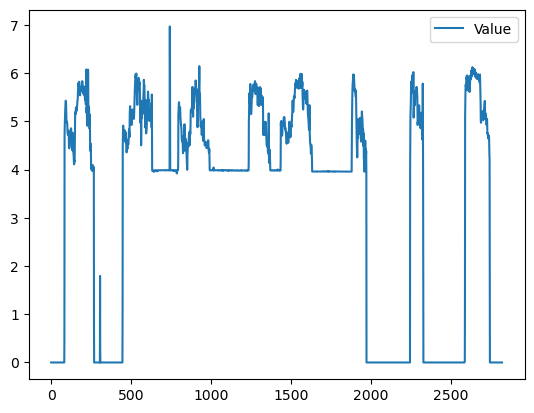

In [196]:
averaged_df = combined_df.groupby(combined_df['date'].dt.date).mean().reset_index()
averaged_df.plot()

In [197]:
averaged_df['date'] = pd.to_datetime(averaged_df['date'])
averaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2822 non-null   datetime64[ns]
 1   Value   2822 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


Text(0.5, 0, 'Time')

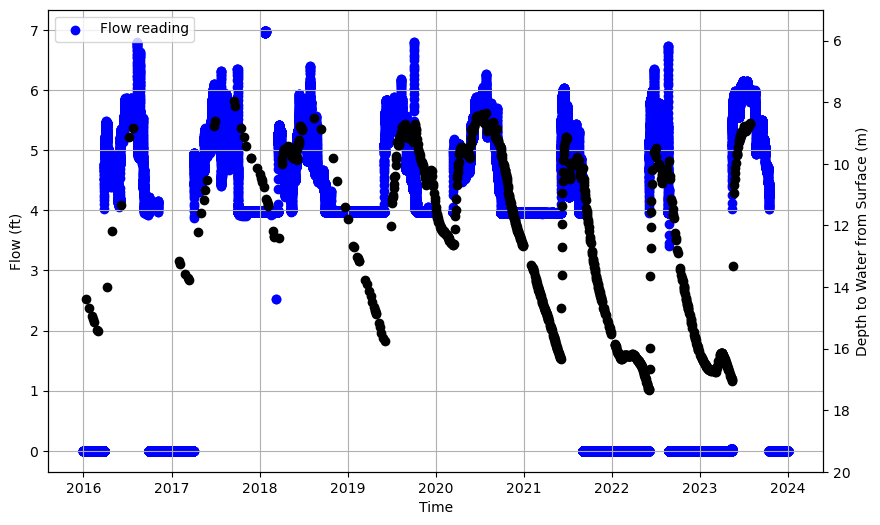

In [198]:
df = head_msavi2
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(combined_df['date'].values,combined_df['Value'].values, c='blue',label='Flow reading')
ax2 = ax.twinx()
ax2.scatter(df['date'].values, df['DTW_Surface'].values, c='black',label = 'DTW_Surface')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
# ax.set(title="msavi2 vs. Head Values at "+site_name)
# ax.set_xlim(0,0.5)
ax2.set_ylim(20,5)
ax.legend(loc = 'upper left')
ax.grid(zorder = 0)
ax2.set_ylabel('Depth to Water from Surface (m)')
ax.set_ylabel('Flow (ft)')
ax.set_xlabel('Time')


In [199]:
head_msavi2_flow = averaged_df.merge(head_msavi2, on=['date'],how='right')
# head_msavi2_flow = pd.concat()
head_msavi2_flow

,date,Value,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection
0,2016-01-11,0.000000,1630.338828,15.50,14.39,7.19,Connected
1,2016-01-24,0.000000,1724.738004,15.78,14.67,7.47,Connected
2,2016-02-04,0.000000,1948.351327,16.05,14.94,7.74,Connected
3,2016-02-10,0.000000,1834.825104,16.17,15.05,7.86,Connected
4,2016-02-15,0.000000,1771.239902,16.26,15.15,7.95,Connected
...,...,...,...,...,...,...,...
950,2023-07-24,5.892917,6403.486749,9.87,8.76,1.56,Connected
951,2023-07-25,5.904375,6517.019626,9.86,8.75,1.55,Connected
952,2023-07-26,5.944792,6625.553805,9.83,8.72,1.52,Connected
953,2023-07-27,5.953125,6810.744693,9.82,8.71,1.51,Connected


Text(0.5, 0, 'Flow (ft)')

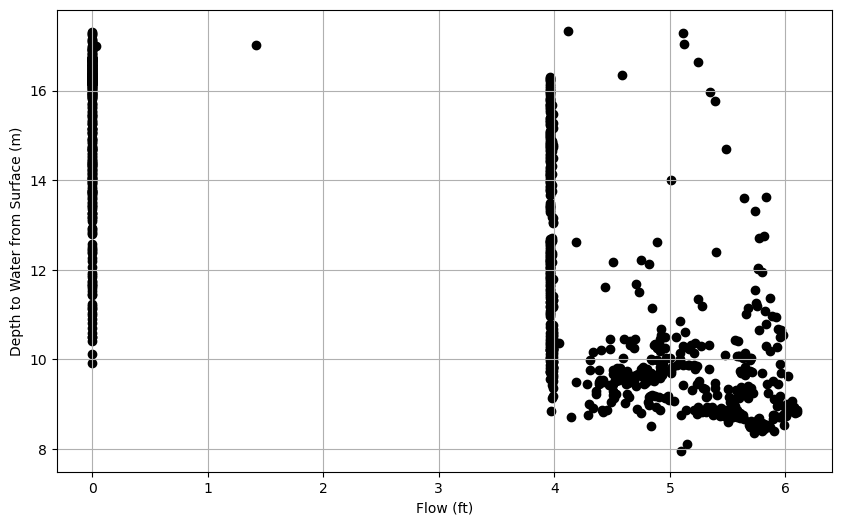

In [200]:
df = head_msavi2_flow
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['Value'].values, df['DTW_Surface'].values, c='black',label = 'DTW_Surface')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
# ax.set(title="msavi2 vs. Head Values at "+site_name)
# ax.set_xlim(0,7)
# ax2.set_ylim(20,5)
# ax.legend(loc = 'upper left')
ax.grid(zorder = 0)
ax.set_ylabel('Depth to Water from Surface (m)')
ax.set_xlabel('Flow (ft)')


In [201]:
df = head_msavi2_flow
# Set 'date' as the index
df.set_index('date', inplace=True)

# Resample by year and calculate the mean
resample_df = df.resample('Y').mean()

# Reset index to get 'date' back as a column
resample_df.reset_index(inplace=True)
resample_df

/var/folders/7k/m9jgv50j0qv046r7xmwxt0qh0000gn/T/ipykernel_78757/3377379661.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resample_df = df.resample('Y').mean()


,date,Value,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed
0,2016-12-31,2.167396,1789.580552,14.490000,13.377500,6.180000
1,2017-12-31,3.505017,1791.536836,11.837000,10.727000,3.527000
2,2018-12-31,4.720348,5327.921404,11.027302,9.912381,2.717302
3,2019-12-31,4.606419,4366.640764,11.750377,10.640377,3.440377
4,2020-12-31,4.694737,4678.541249,11.622664,10.508079,3.312620
5,2021-12-31,2.786508,5924.441437,14.396238,13.282277,6.086188
6,2022-12-31,0.961711,5580.756427,15.885612,14.775612,7.575612
7,2023-12-31,2.040405,5583.011888,15.224160,14.114160,6.914160


Text(0.5, 0, 'Flow (ft)')

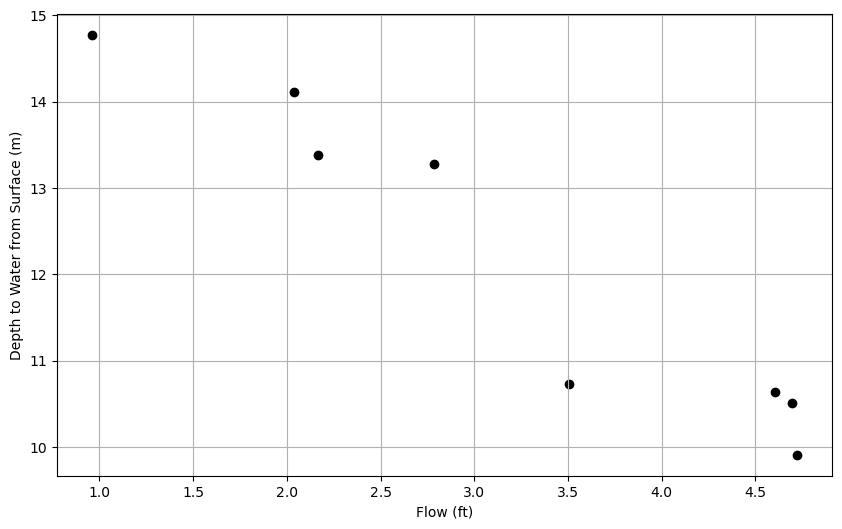

In [202]:
df = resample_df
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['Value'].values, df['DTW_Surface'].values, c='black',label = 'DTW_Surface')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
# ax.set(title="msavi2 vs. Head Values at "+site_name)
# ax.set_xlim(0,7)
# ax2.set_ylim(20,5)
# ax.legend(loc = 'upper left')
ax.grid(zorder = 0)
ax.set_ylabel('Depth to Water from Surface (m)')
ax.set_xlabel('Flow (ft)')


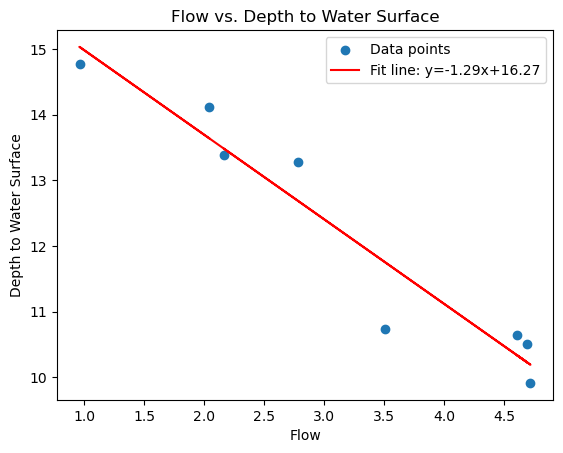

Linear regression equation: y = -1.29x + 16.27


In [203]:
from scipy.stats import linregress

df = resample_df
# Scatterplot data
y = df['DTW_Surface']
x = df['Value']

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create regression line
regression_line = slope * x + intercept

# Plot scatterplot
plt.scatter(x, y, label='Data points')

# Plot regression line
plt.plot(x, regression_line, color='red', label=f'Fit line: y={slope:.2f}x+{intercept:.2f}')

# Add title and labels
plt.title('Flow vs. Depth to Water Surface')
plt.ylabel('Depth to Water Surface')
plt.xlabel('Flow')

# Display regression equation on plot
plt.legend()

# Show plot
plt.show()

# Print regression equation
print(f'Linear regression equation: y = {slope:.2f}x + {intercept:.2f}')

In [204]:
# head_msavi2_flow['Adjusted_DTW'] = head_msavi2_flow['DTW_Surface']-intercept
head_msavi2_flow['Adjusted_DTW'] = head_msavi2_flow['DTW_Surface']-10
head_msavi2_flow

,Value,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection,Adjusted_DTW
date,,,,,,,
2016-01-11,0.000000,1630.338828,15.50,14.39,7.19,Connected,4.39
2016-01-24,0.000000,1724.738004,15.78,14.67,7.47,Connected,4.67
2016-02-04,0.000000,1948.351327,16.05,14.94,7.74,Connected,4.94
2016-02-10,0.000000,1834.825104,16.17,15.05,7.86,Connected,5.05
2016-02-15,0.000000,1771.239902,16.26,15.15,7.95,Connected,5.15
...,...,...,...,...,...,...,...
2023-07-24,5.892917,6403.486749,9.87,8.76,1.56,Connected,-1.24
2023-07-25,5.904375,6517.019626,9.86,8.75,1.55,Connected,-1.25
2023-07-26,5.944792,6625.553805,9.83,8.72,1.52,Connected,-1.28


<Axes: xlabel='date'>

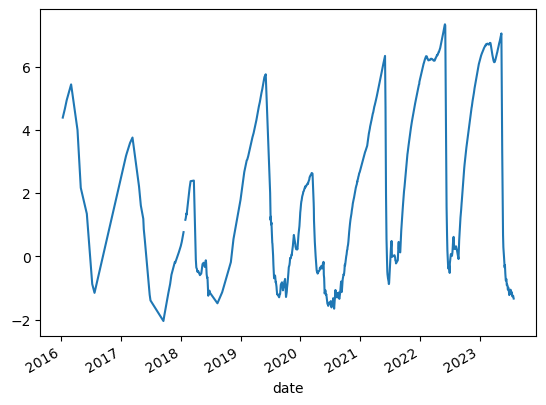

In [205]:
head_msavi2_flow['Adjusted_DTW'].plot()

In [206]:
head_msavi2_flow.index

DatetimeIndex(['2016-01-11', '2016-01-24', '2016-02-04', '2016-02-10',
               '2016-02-15', '2016-02-28', '2016-03-02', '2016-04-10',
               '2016-04-30', '2016-06-06',
               ...
               '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-17',
               '2023-07-19', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', name='date', length=955, freq=None)

Text(0.5, 0, 'Time')

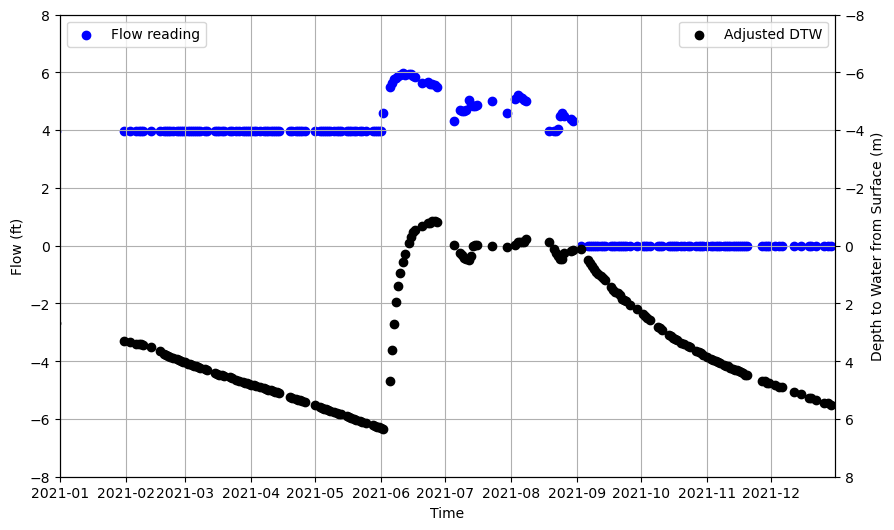

In [207]:
df = head_msavi2_flow
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df.index,df['Value'].values, c='blue',label='Flow reading')
ax2 = ax.twinx()
ax2.scatter(df.index, df['Adjusted_DTW'].values, c='black',label='Adjusted DTW')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
# ax.set(title="msavi2 vs. Head Values at "+site_name)
ax.set_xlim(pd.Timestamp('2021-01-01'),pd.Timestamp('2021-12-31'))
ax2.set_ylim(8,-8)
ax.set_ylim(-8,8)
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax.grid(zorder = 0)
ax2.set_ylabel('Depth to Water from Surface (m)')
ax.set_ylabel('Flow (ft)')
ax.set_xlabel('Time')


In [208]:
head_msavi2_flow['Stream_Connection'] = np.where(head_msavi2_flow['DTW_Surface'] > 10, 'Disconnected', 'Connected')
head_msavi2_flow

,Value,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection,Adjusted_DTW
date,,,,,,,
2016-01-11,0.000000,1630.338828,15.50,14.39,7.19,Disconnected,4.39
2016-01-24,0.000000,1724.738004,15.78,14.67,7.47,Disconnected,4.67
2016-02-04,0.000000,1948.351327,16.05,14.94,7.74,Disconnected,4.94
2016-02-10,0.000000,1834.825104,16.17,15.05,7.86,Disconnected,5.05
2016-02-15,0.000000,1771.239902,16.26,15.15,7.95,Disconnected,5.15
...,...,...,...,...,...,...,...
2023-07-24,5.892917,6403.486749,9.87,8.76,1.56,Connected,-1.24
2023-07-25,5.904375,6517.019626,9.86,8.75,1.55,Connected,-1.25
2023-07-26,5.944792,6625.553805,9.83,8.72,1.52,Connected,-1.28


In [209]:
head_msavi2_flow.rename(columns = {'Value':'StreamGauge'}, inplace=True)
head_msavi2_flow

,StreamGauge,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection,Adjusted_DTW
date,,,,,,,
2016-01-11,0.000000,1630.338828,15.50,14.39,7.19,Disconnected,4.39
2016-01-24,0.000000,1724.738004,15.78,14.67,7.47,Disconnected,4.67
2016-02-04,0.000000,1948.351327,16.05,14.94,7.74,Disconnected,4.94
2016-02-10,0.000000,1834.825104,16.17,15.05,7.86,Disconnected,5.05
2016-02-15,0.000000,1771.239902,16.26,15.15,7.95,Disconnected,5.15
...,...,...,...,...,...,...,...
2023-07-24,5.892917,6403.486749,9.87,8.76,1.56,Connected,-1.24
2023-07-25,5.904375,6517.019626,9.86,8.75,1.55,Connected,-1.25
2023-07-26,5.944792,6625.553805,9.83,8.72,1.52,Connected,-1.28


In [210]:
head_msavi2_flow.to_csv("outputfiles/MES_48R/"+site_name+"_DailyTimeseriesProcessedData.csv")

In [211]:
disconnected_df = head_msavi2_flow[head_msavi2_flow['Stream_Connection']=='Disconnected']
disconnected_df

,StreamGauge,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection,Adjusted_DTW
date,,,,,,,
2016-01-11,0.000000,1630.338828,15.50,14.39,7.19,Disconnected,4.39
2016-01-24,0.000000,1724.738004,15.78,14.67,7.47,Disconnected,4.67
2016-02-04,0.000000,1948.351327,16.05,14.94,7.74,Disconnected,4.94
2016-02-10,0.000000,1834.825104,16.17,15.05,7.86,Disconnected,5.05
2016-02-15,0.000000,1771.239902,16.26,15.15,7.95,Disconnected,5.15
...,...,...,...,...,...,...,...
2023-05-23,5.886667,5601.612668,12.07,10.96,3.76,Disconnected,0.96
2023-05-24,5.932292,5895.332021,11.79,10.68,3.48,Disconnected,0.68
2023-05-25,5.955208,5886.850639,11.60,10.49,3.29,Disconnected,0.49


Text(0.5, 0, 'DTW (m)')

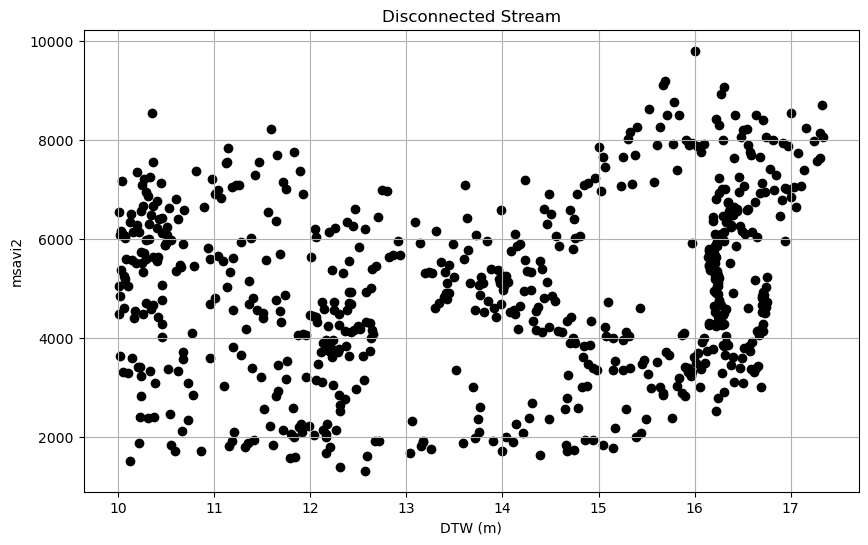

In [212]:
df = disconnected_df
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df.DTW_Surface,df['msavi2'].values, c='black',label='')
# ax2 = ax.twinx()
# ax2.scatter(df.index, df['DTW_Surface'].values, c='black',label='DTW')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="Disconnected Stream")
# ax.set_xlim(pd.Timestamp('2021-01-01'),pd.Timestamp('2021-12-31'))
# ax2.set_ylim(8,-8)
# ax.set_ylim(-8,8)
# ax.legend(loc = 'upper left')
# ax2.legend(loc = 'upper right')
ax.grid(zorder = 0)
# ax2.set_ylabel('Depth to Water from Surface (m)')
ax.set_ylabel('msavi2')
ax.set_xlabel('DTW (m)')

In [213]:
connected_df = head_msavi2_flow[head_msavi2_flow['Stream_Connection']=='Connected']
connected_df

,StreamGauge,msavi2,DTW_TOIC,DTW_Surface,DTW_Streambed,Stream_Connection,Adjusted_DTW
date,,,,,,,
2016-07-09,5.671667,1581.419009,10.24,9.13,1.93,Connected,-0.87
2016-07-23,5.575625,1610.384368,9.96,8.85,1.65,Connected,-1.15
2017-06-25,5.986458,3058.937732,9.90,8.79,1.59,Connected,-1.21
2017-06-30,5.503696,1717.466978,9.72,8.61,1.41,Connected,-1.39
2017-09-17,5.096250,1257.039801,9.07,7.96,0.76,Connected,-2.04
...,...,...,...,...,...,...,...
2023-07-24,5.892917,6403.486749,9.87,8.76,1.56,Connected,-1.24
2023-07-25,5.904375,6517.019626,9.86,8.75,1.55,Connected,-1.25
2023-07-26,5.944792,6625.553805,9.83,8.72,1.52,Connected,-1.28


Text(0.5, 0, 'DTW (m)')

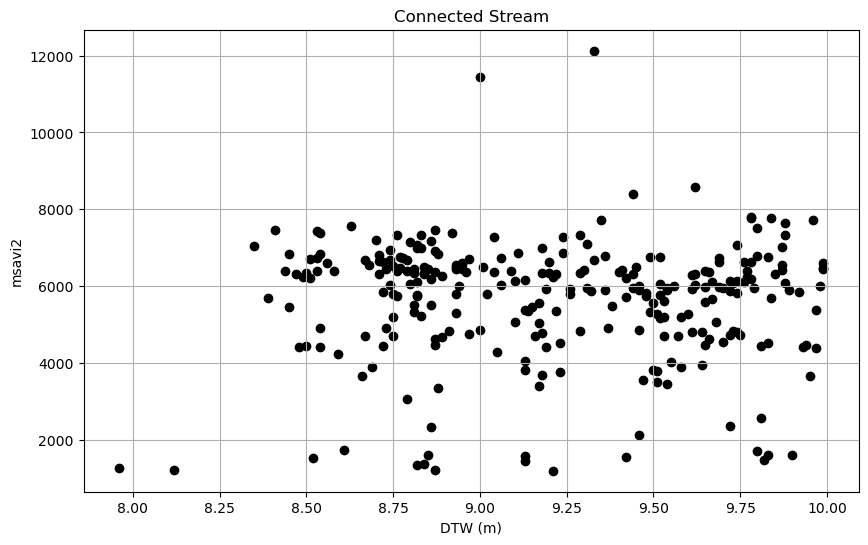

In [214]:
df = connected_df
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df.DTW_Surface,df['msavi2'].values, c='black',label='')
# ax2 = ax.twinx()
# ax2.scatter(df.index, df['DTW_Surface'].values, c='black',label='DTW')
# ax.scatter(df['date'].values, df['DTW_TOIC'].values, c='blue',label = 'DTW_TOIC')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
# ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="Connected Stream")
# ax.set_xlim(pd.Timestamp('2021-01-01'),pd.Timestamp('2021-12-31'))
# ax2.set_ylim(8,-8)
# ax.set_ylim(-8,8)
# ax.legend(loc = 'upper left')
# ax2.legend(loc = 'upper right')
ax.grid(zorder = 0)
# ax2.set_ylabel('Depth to Water from Surface (m)')
ax.set_ylabel('msavi2')
ax.set_xlabel('DTW (m)')

<Figure size 1000x500 with 0 Axes>

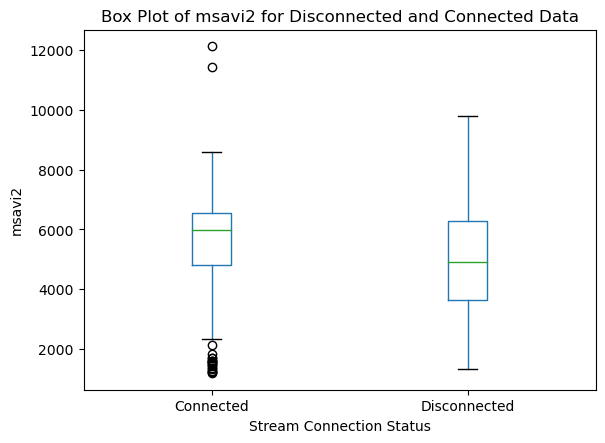

In [215]:
# Create a box plot
plt.figure(figsize=(10, 5))
head_msavi2_flow.boxplot(column='msavi2', by='Stream_Connection', grid=False)

# Adding labels and title
plt.xlabel('Stream Connection Status')
plt.ylabel('msavi2')
plt.title('Box Plot of msavi2 for Disconnected and Connected Data')
plt.suptitle('')  # Suppress the default title to avoid redundancy

# Display the plot
plt.show()

This is old Data

In [49]:
# Reading in KC's data
seepage = pd.read_csv('Data/From_KC/Flow_values.csv')
seepage

,Monitoring station,Rin_10R,Rin_1R,Rin_11R,Rin_9R,Rin_2R,Rin_8R,Rin_3R,Rin_7R,Rin_4R,Rin_5R,Rin_12R,Rin_6R,Rin_13R,Mean,Sum,Std dev
0,2010.0,0.040,0.016,0.021,-0.001,0.001,0.035,0.020,0.030,0.014,0.019,0.003,-0.018,0.000,0.012,0.141,0.014
1,2011.0,0.054,0.039,0.061,0.059,0.046,0.049,0.044,0.050,0.035,0.024,0.033,0.007,0.004,0.038,0.451,0.018
2,2012.0,0.101,0.089,0.113,0.113,0.113,0.061,0.096,0.082,0.081,0.056,0.074,0.035,0.031,0.079,0.944,0.027
3,2013.0,0.058,0.064,0.098,0.113,0.080,0.045,0.063,0.053,0.058,0.042,0.072,0.016,0.034,0.061,0.737,0.026
4,2014.0,0.074,0.087,0.113,0.113,0.097,0.063,0.093,0.075,0.090,0.061,0.113,0.024,0.042,0.081,0.972,0.028
5,2015.0,0.050,0.055,0.088,0.109,0.056,0.036,0.063,0.045,0.060,0.037,0.083,0.014,0.025,0.056,0.672,0.026
6,2016.0,0.092,0.099,0.113,0.113,0.095,0.056,0.096,0.067,0.091,0.062,0.082,0.012,0.048,0.078,0.935,0.029
7,2017.0,0.052,0.045,0.065,0.089,0.042,0.020,0.034,0.053,0.044,0.035,0.011,-0.016,0.027,0.037,0.449,0.025
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
head = pd.read_csv('Data/From_KC/Groundwater_head_values.csv')
head

,Monitoring station,Rin_10R,Rin_1R,Rin_11R,Rin_9R,Rin_2R,Rin_8R,Rin_3R,Rin_7R,Rin_4R,Rin_5R,Rin_12R,Rin_6R,Rin_13R,Mean,Sum,Std dev
0,2010,0.859,1.015,1.772,0.771,1.101,1.003,1.242,1.366,1.803,1.621,2.548,2.345,2.014,1.550,18.601,0.539
1,2011,0.466,0.548,0.982,-0.289,0.287,0.620,0.751,0.897,1.380,1.465,2.005,1.967,1.948,1.047,12.559,0.693
2,2012,0.139,0.109,0.181,-0.341,-0.341,0.722,0.300,0.753,0.970,1.177,1.647,1.642,1.616,0.703,8.434,0.699
3,2013,0.095,-0.223,-0.178,-0.341,-0.341,0.470,0.085,0.587,0.684,0.936,0.941,1.706,1.228,0.463,5.554,0.643
4,2014,0.017,-0.341,-0.341,-0.341,-0.341,0.296,-0.248,0.357,0.280,0.727,-0.026,1.623,1.213,0.238,2.857,0.631
5,2015,0.132,-0.181,-0.199,-0.341,-0.317,0.558,-0.105,0.648,0.454,0.936,0.440,1.729,1.365,0.416,4.987,0.651
6,2016,0.364,0.104,0.543,-0.341,0.019,0.855,0.422,1.022,0.960,1.184,1.645,1.948,1.458,0.818,9.818,0.664
7,2017,0.694,0.604,1.166,-0.341,0.533,1.223,1.055,1.055,1.385,1.402,2.440,2.305,1.630,1.205,14.458,0.721


In [146]:
# Case study stations
seepage_studyareas = seepage[['Monitoring station','Rin_11R','Rin_2R','Rin_12R']]

head_studyareas = head[['Monitoring station','Rin_11R','Rin_2R','Rin_12R']]
head_studyareas

,Monitoring station,Rin_11R,Rin_2R,Rin_12R
0,2010,1.772,1.101,2.548
1,2011,0.982,0.287,2.005
2,2012,0.181,-0.341,1.647
3,2013,-0.178,-0.341,0.941
4,2014,-0.341,-0.341,-0.026
5,2015,-0.199,-0.317,0.440
6,2016,0.543,0.019,1.645
7,2017,1.166,0.533,2.440


In [147]:
seepage_studyareas = seepage_studyareas.rename(columns= {'Monitoring station':'Year'})
head_studyareas = head_studyareas.rename(columns= {'Monitoring station':'Year'})
seepage_studyareas = seepage_studyareas.set_index('Year')
head_studyareas = head_studyareas.set_index('Year')
head_studyareas

,Rin_11R,Rin_2R,Rin_12R
Year,,,
2010,1.772,1.101,2.548
2011,0.982,0.287,2.005
2012,0.181,-0.341,1.647
2013,-0.178,-0.341,0.941
2014,-0.341,-0.341,-0.026
2015,-0.199,-0.317,0.440
2016,0.543,0.019,1.645
2017,1.166,0.533,2.440


In [122]:
# msavi2_ts_df = msavi2_ts_df.set_index('Year')
msavi2_ts_df
msavi2_df_year_min = pd.pivot_table(msavi2_ts_df, index=["Year"], values=['msavi2'], dropna=False, aggfunc=np.min)
msavi2_df_year_max = pd.pivot_table(msavi2_ts_df, index=["Year"], values=['msavi2'], dropna=False, aggfunc=np.max)
msavi2_df_year_mean = pd.pivot_table(msavi2_ts_df, index=["Year"], values=['msavi2'], dropna=False, aggfunc=np.mean)

msavi2_df_year_max

,NDVI
Year,
2010,0.180760
2012,0.114276
2013,0.150722
2014,0.144066
2015,0.077225
2016,0.089095
2017,0.118029


Text(0, 0.5, 'Net Annual Pressure Head (m)')

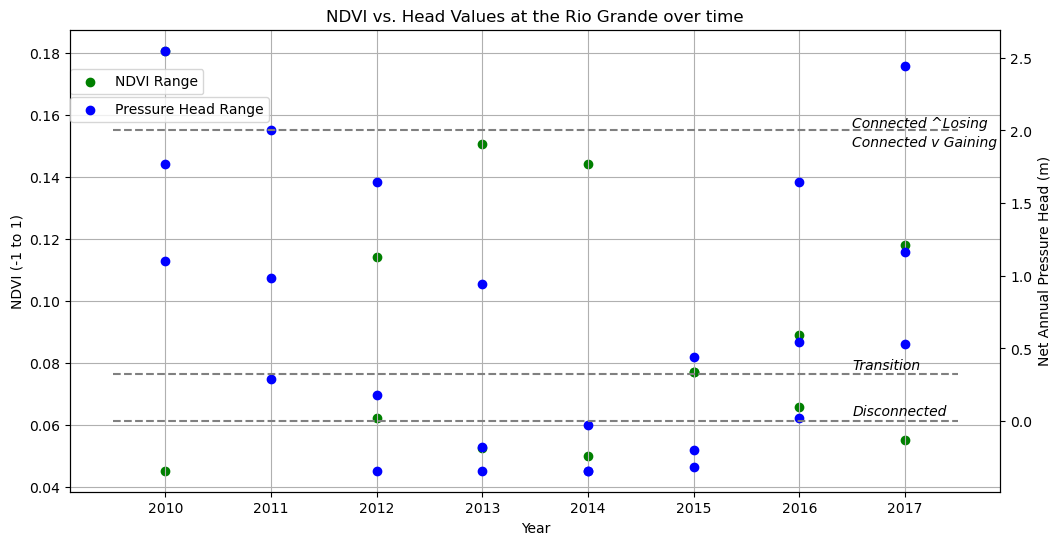

In [216]:
f, ax = plt.subplots(figsize=(12,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax2 = ax.twinx()
ax2.scatter(head_studyareas.index, head_studyareas['Rin_11R'], c='blue', label = 'Pressure Head Range')
ax2.scatter(head_studyareas.index, head_studyareas['Rin_2R'], c='blue')
ax2.scatter(head_studyareas.index, head_studyareas['Rin_12R'], c='blue')
ax.scatter(msavi2_df_year_max.index, msavi2_df_year_max['msavi2'], c='green',label = 'msavi2 Range')
ax.scatter(msavi2_df_year_min.index, msavi2_df_year_min['msavi2'], c='green')
ax2.hlines(y=2.0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax2.hlines(y=0.325, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax.text(2016.5, 0.156, 'Connected ^Losing', style='italic', bbox={
        'facecolor': 'white', 'alpha': 0, 'pad': 5})
ax.text(2016.5, 0.150, 'Connected v Gaining', style='italic', bbox={
        'facecolor': 'white', 'alpha': 0, 'pad': 5})
ax.text(2016.5, 0.078, 'Transition', style='oblique', bbox={
        'facecolor': 'white', 'alpha': 0.0, 'pad': 5})
ax.text(2016.5, 0.063, 'Disconnected', style='oblique', bbox={
        'facecolor': 'white', 'alpha': 0, 'pad': 5})
ax.set(title="msavi2 vs. Head Values at the Rio Grande over time")
ax.legend(loc = [0,0.86])
ax2.legend(loc = [0,0.8])
ax.grid(zorder = 0)
ax.set_xlabel('Year')
ax.set_ylabel('msavi2 (-1 to 1)')
ax2.set_ylabel('Net Annual Pressure Head (m)')

Text(0, 0.5, 'Seepage Flow (cms)')

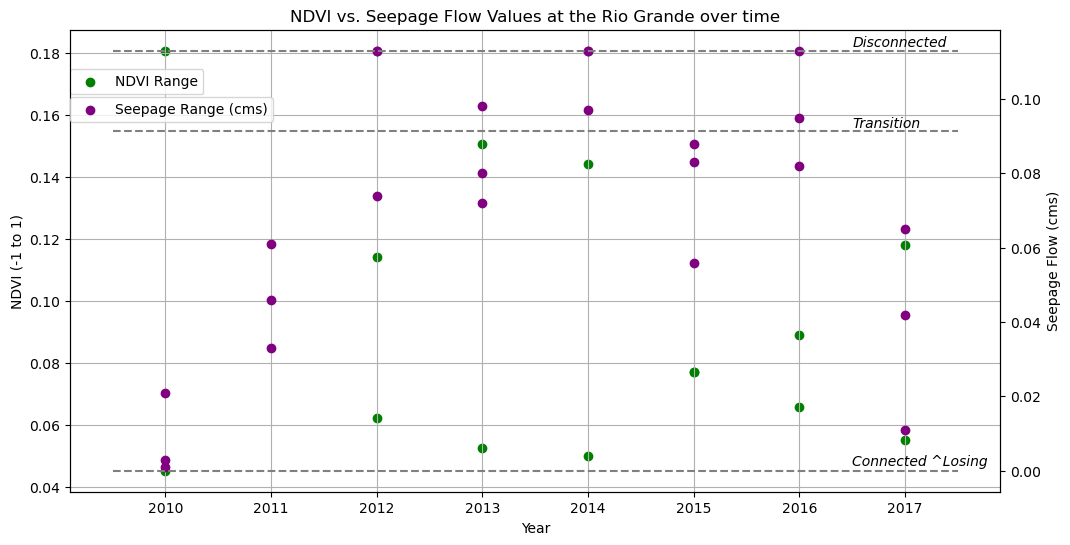

In [210]:
f, ax = plt.subplots(figsize=(12,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax2 = ax.twinx()
ax2.scatter(seepage_studyareas.index, seepage_studyareas['Rin_11R'], c='purple', label = 'Seepage Range (cms)')
ax2.scatter(seepage_studyareas.index, seepage_studyareas['Rin_2R'], c='purple')
ax2.scatter(seepage_studyareas.index, seepage_studyareas['Rin_12R'], c='purple')
ax.scatter(msavi2_df_year_max.index, msavi2_df_year_max['msavi2'], c='green',label = 'msavi2 Range')
ax.scatter(msavi2_df_year_min.index, msavi2_df_year_min['msavi2'], c='green')
ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax2.hlines(y=0.0914, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
ax.text(2016.5, 0.047, 'Connected ^Losing', style='italic', bbox={
        'facecolor': 'white', 'alpha': 0, 'pad': 5})
ax.text(2016.5, 0.156, 'Transition', style='oblique', bbox={
        'facecolor': 'white', 'alpha': 0.0, 'pad': 5})
ax.text(2016.5, 0.182, 'Disconnected', style='oblique', bbox={
        'facecolor': 'white', 'alpha': 0, 'pad': 5})
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Seepage Flow Values at the Rio Grande over time")
ax.legend(loc = [0,0.86])
ax2.legend(loc = [0,0.8])
ax.grid(zorder = 0)
ax.set_xlabel('Year')
ax.set_ylabel('msavi2 (-1 to 1)')
ax2.set_ylabel('Seepage Flow (cms)')

In [129]:
msavi2_DF2 = msavi2_df_year_mean.reset_index()
# msavi2_DF2 = msavi2_DF2.append([2011,np.nan])

df = msavi2_DF2.append({'Year':2011, 'msavi2':np.nan}, ignore_index=True)
df

/var/folders/7k/m9jgv50j0qv046r7xmwxt0qh0000gn/T/ipykernel_3184/3983479622.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = NDVI_DF2.append({'Year':2011, 'NDVI':np.nan}, ignore_index=True)


,Year,NDVI
0,2010.0,0.098050
1,2012.0,0.088233
2,2013.0,0.081068
3,2014.0,0.079872
4,2015.0,0.077225
5,2016.0,0.080045
6,2017.0,0.089396
7,2011.0,NaN


Text(0.5, 0, 'NDVI (-1 to 1)')

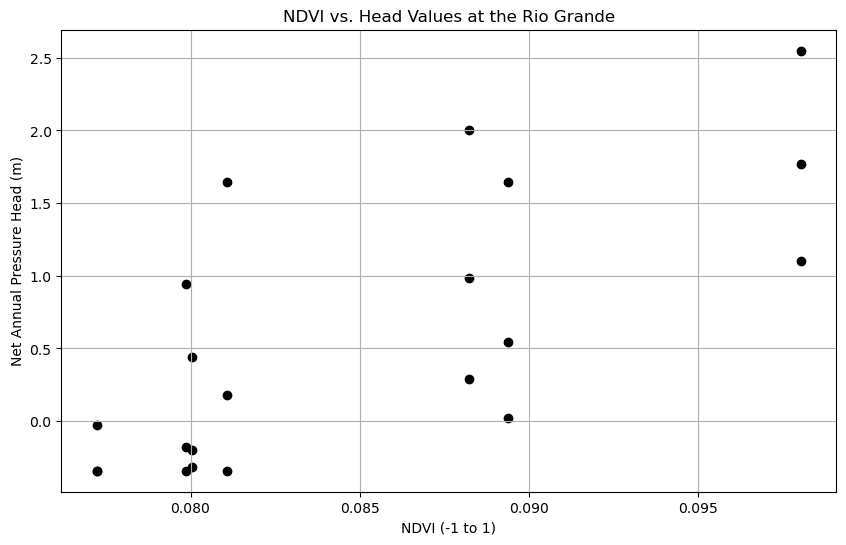

In [152]:
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['msavi2'].values, head_studyareas['Rin_11R'].values, c='black',label = 'msavi2 Range')
ax.scatter(df['msavi2'].values, head_studyareas['Rin_2R'].values, c='black',label = 'msavi2 Range')
ax.scatter(df['msavi2'].values, head_studyareas['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Head Values at the Rio Grande")
# ax.legend(loc = 'lower left')
ax.grid(zorder = 0)
ax.set_ylabel('Net Annual Pressure Head (m)')
ax.set_xlabel('msavi2 (-1 to 1)')


In [148]:
# y = seepage_studyareas['Rin_11R'].values
y = seepage_studyareas.iloc[:-1,:]
y

,Rin_11R,Rin_2R,Rin_12R
Year,,,
2010.0,0.021,0.001,0.003
2011.0,0.061,0.046,0.033
2012.0,0.113,0.113,0.074
2013.0,0.098,0.080,0.072
2014.0,0.113,0.097,0.113
2015.0,0.088,0.056,0.083
2016.0,0.113,0.095,0.082
2017.0,0.065,0.042,0.011


Text(0.5, 0, 'NDVI (-1 to 1)')

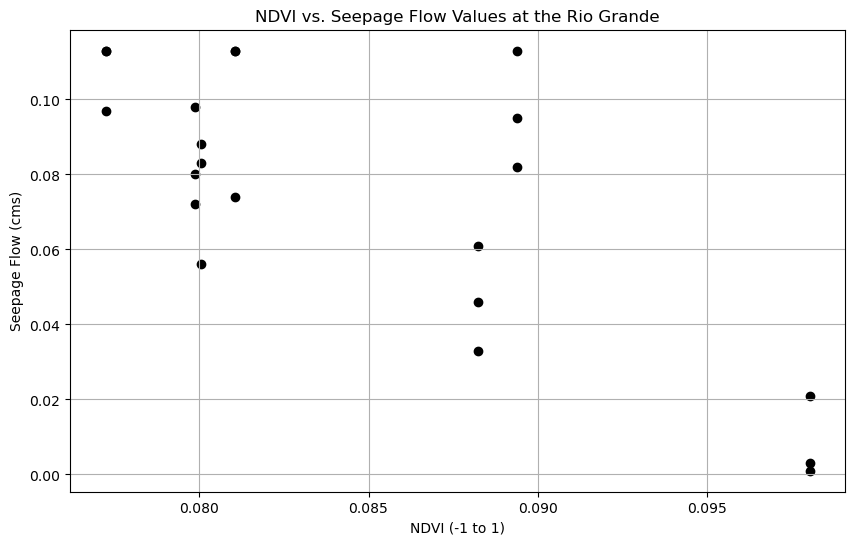

In [151]:
f, ax = plt.subplots(figsize=(10,6))
# ax.scatter(msavi2_ts.index, msavi2_ts[0], color='red')
ax.scatter(df['msavi2'].values, y['Rin_11R'].values, c='black',label = 'msavi2 Range')
ax.scatter(df['msavi2'].values, y['Rin_2R'].values, c='black',label = 'msavi2 Range')
ax.scatter(df['msavi2'].values, y['Rin_12R'].values, c='black',label = 'msavi2 Range')
# ax2.hlines(y=0.113, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax2.hlines(y=0.0915, xmin = 2009.5, xmax = 2017.5,color='grey',linestyles='--')
# ax.axvspan("2017-06-10T12:00:00.000Z", "2018-06-16T00:00:00.000Z", color='grey', alpha=0.5, lw=0, label="Satellite relaunch gap")
ax.set(title="msavi2 vs. Seepage Flow Values at the Rio Grande")
# ax.legend(loc = 'lower left')
ax.grid(zorder = 0)
ax.set_ylabel('Seepage Flow (cms)')
ax.set_xlabel('msavi2 (-1 to 1)')
